In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

CH4

In [2]:
dtCH4 = pd.read_excel('CH4.xlsx')

In [3]:
dtCH4.dtypes

,0
site,object
year,int64
month,int64
value,object


In [4]:
dtCH4.head()

,site,year,month,value
0,BKT,2004,1,1842.58
1,BKT,2004,2,1831.25
2,BKT,2004,3,1820.49
3,BKT,2004,4,1812.67
4,BKT,2004,5,1781.45


In [5]:
dtCH4['time_in_months'] = dtCH4['year'] + (dtCH4['month'] - 1) / 12

In [6]:
model = LinearRegression()

In [7]:
dtCH4['value'] = pd.to_numeric(dtCH4['value'], errors='coerce')

In [8]:
dtCH4 = dtCH4.dropna()

In [9]:
XCH4 = dtCH4[['time_in_months']]
yCH4 = dtCH4['value']

In [10]:
model.fit(XCH4, yCH4)

LinearRegression()

In [11]:
future_years = np.arange(2024, 2101)
future_months = np.arange(1, 13)

In [12]:
future_time_in_months = []
for year in future_years:
    for month in future_months:
        future_time_in_months.append(year + (month - 1) / 12)

future_time_in_months = np.array(future_time_in_months).reshape(-1, 1)

In [13]:
predicted_values = model.predict(future_time_in_months)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


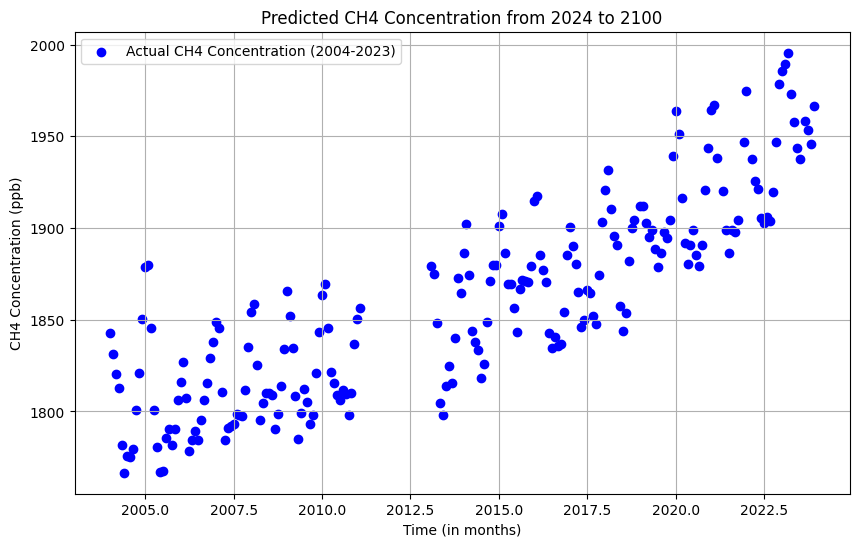

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(XCH4, yCH4, color='blue', label='Actual CH4 Concentration (2004-2023)', linestyle='-')  # Actual data points
plt.xlabel('Time (in months)')
plt.ylabel('CH4 Concentration (ppb)')
plt.title('Predicted CH4 Concentration from 2024 to 2100')
plt.legend()
plt.grid(True)
plt.show()

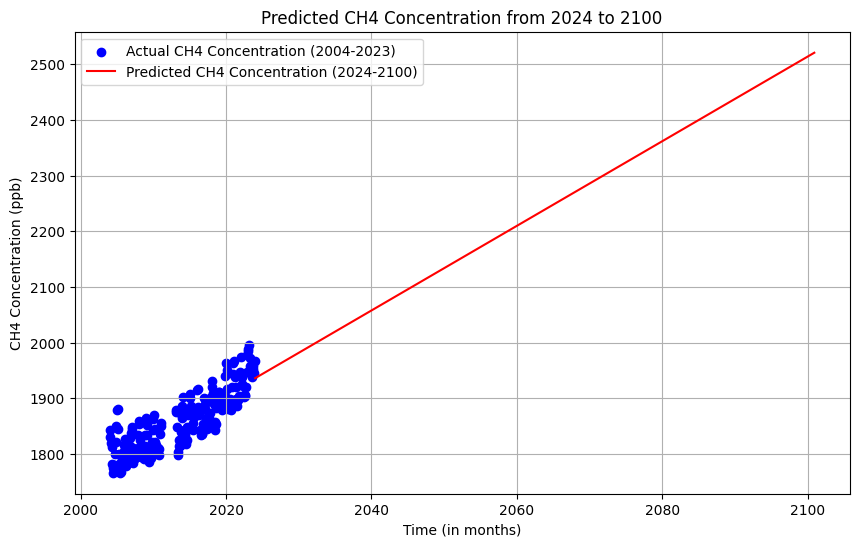

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(XCH4, yCH4, color='blue', label='Actual CH4 Concentration (2004-2023)', linestyle='-')  # Actual data points
plt.plot(future_time_in_months, predicted_values, color='red', label='Predicted CH4 Concentration (2024-2100)', linestyle='-')  # Predictions
plt.xlabel('Time (in months)')
plt.ylabel('CH4 Concentration (ppb)')
plt.title('Predicted CH4 Concentration from 2024 to 2100')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
last_predicted_value = predicted_values[-1]

print(f"The predicted CH4 concentration at the end of the data (year 2100) is: {last_predicted_value:.2f}")

The predicted CH4 concentration at the end of the data (year 2100) is: 2520.36


Interpolation of CH4

In [17]:
full_years = np.arange(2004, 2025)
full_months = np.arange(1, 13)

full_range = pd.DataFrame([(year, month) for year in full_years for month in full_months], columns=['year', 'month'])

full_range['time_in_months'] = full_range['year'] + (full_range['month'] - 1) / 12

In [18]:
dtCH4_full = pd.merge(full_range, dtCH4[['year', 'month', 'time_in_months', 'value']], on=['year', 'month', 'time_in_months'], how='left')

dtCH4_full['value'] = dtCH4_full['value'].interpolate(method='linear')

dtCH4_full = dtCH4_full.dropna()

print(dtCH4_full[(dtCH4_full['year'] >= 2004) & (dtCH4_full['year'] <= 2014)])

     year  month  time_in_months    value
0    2004      1     2004.000000  1842.58
1    2004      2     2004.083333  1831.25
2    2004      3     2004.166667  1820.49
3    2004      4     2004.250000  1812.67
4    2004      5     2004.333333  1781.45
..    ...    ...             ...      ...
127  2014      8     2014.583333  1825.75
128  2014      9     2014.666667  1848.75
129  2014     10     2014.750000  1870.93
130  2014     11     2014.833333  1879.74
131  2014     12     2014.916667  1879.90

[132 rows x 4 columns]


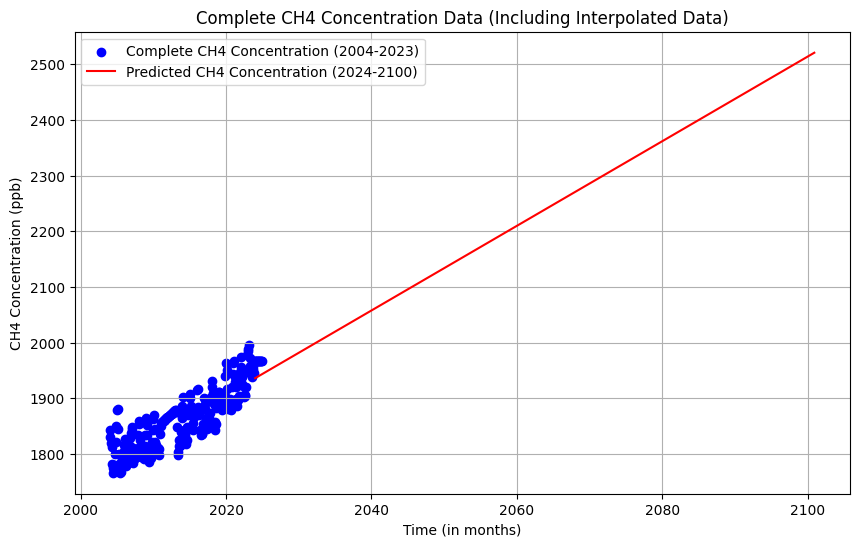

In [19]:
plt.figure(figsize=(10, 6))

plt.scatter(dtCH4_full['time_in_months'], dtCH4_full['value'], color='blue', label='Complete CH4 Concentration (2004-2023)', linestyle='-')

plt.plot(future_time_in_months, predicted_values, color='red', label='Predicted CH4 Concentration (2024-2100)', linestyle='-')  # Predictions

plt.xlabel('Time (in months)')
plt.ylabel('CH4 Concentration (ppb)')
plt.title('Complete CH4 Concentration Data (Including Interpolated Data)')
plt.legend()
plt.grid(True)

plt.show()

-------------------------------

CO

In [20]:
dtCO = pd.read_excel('CO.xlsx')

In [21]:
dtCO['time_in_months'] = dtCO['year'] + (dtCO['month'] - 1) / 12

In [22]:
modelCO = LinearRegression()

In [23]:
dtCO['value'] = pd.to_numeric(dtCO['value'], errors='coerce')

In [24]:
dtCO = dtCO.dropna()

In [25]:
XCO = dtCO[['time_in_months']]
yCO = dtCO['value']

In [26]:
model.fit(XCO, yCO)

LinearRegression()

In [27]:
future_years = np.arange(2024, 2101)
future_months = np.arange(1, 13)

In [28]:
future_time_in_months = []
for year in future_years:
    for month in future_months:
        future_time_in_months.append(year + (month - 1) / 12)

future_time_in_months = np.array(future_time_in_months).reshape(-1, 1)

In [29]:
predicted_values = model.predict(future_time_in_months)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


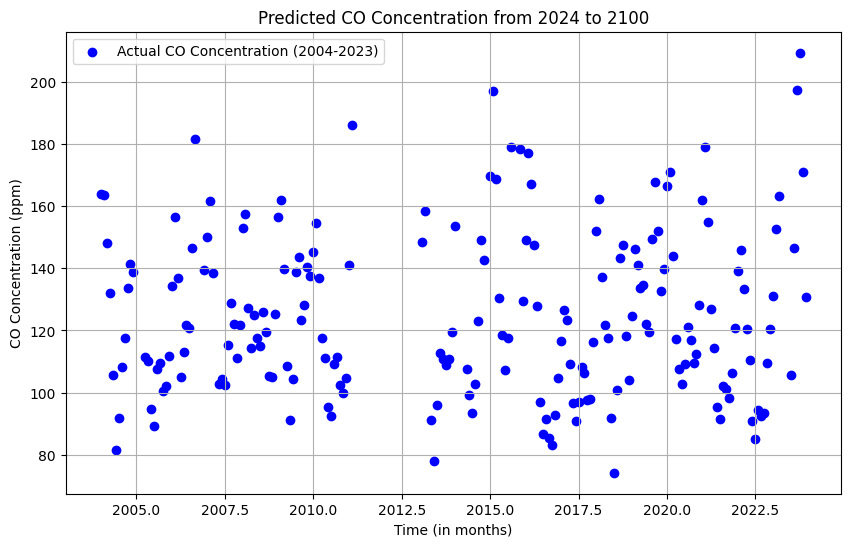

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(XCO, yCO, color='blue', label='Actual CO Concentration (2004-2023)', linestyle='-')  # Actual data points
plt.xlabel('Time (in months)')
plt.ylabel('CO Concentration (ppm)')
plt.title('Predicted CO Concentration from 2024 to 2100')
plt.legend()
plt.grid(True)
plt.show()

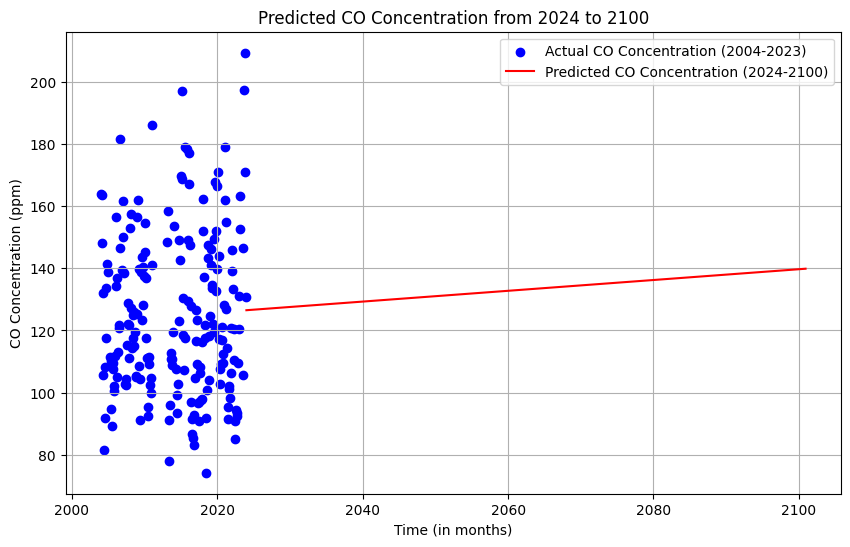

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(XCO, yCO, color='blue', label='Actual CO Concentration (2004-2023)', linestyle='-')  # Actual data points
plt.plot(future_time_in_months, predicted_values, color='red', label='Predicted CO Concentration (2024-2100)', linestyle='-')  # Predictions
plt.xlabel('Time (in months)')
plt.ylabel('CO Concentration (ppm)')
plt.title('Predicted CO Concentration from 2024 to 2100')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
last_predicted_value = predicted_values[-1]

print(f"The predicted CO concentration at the end of the data (year 2100) is: {last_predicted_value:.2f}")

The predicted CO concentration at the end of the data (year 2100) is: 139.83


Interpolation of CO

In [33]:
full_years = np.arange(2004, 2025)
full_months = np.arange(1, 13)

full_range = pd.DataFrame([(year, month) for year in full_years for month in full_months], columns=['year', 'month'])

full_range['time_in_months'] = full_range['year'] + (full_range['month'] - 1) / 12

In [34]:
dtCO_full = pd.merge(full_range, dtCO[['year', 'month', 'time_in_months', 'value']], on=['year', 'month', 'time_in_months'], how='left')

dtCO_full['value'] = dtCO_full['value'].interpolate(method='linear')

dtCO_full = dtCO_full.dropna()

print(dtCO_full[(dtCO_full['year'] >= 2004) & (dtCO_full['year'] <= 2014)])

     year  month  time_in_months   value
0    2004      1     2004.000000  163.76
1    2004      2     2004.083333  163.48
2    2004      3     2004.166667  148.24
3    2004      4     2004.250000  132.16
4    2004      5     2004.333333  105.70
..    ...    ...             ...     ...
127  2014      8     2014.583333  102.83
128  2014      9     2014.666667  123.03
129  2014     10     2014.750000  148.94
130  2014     11     2014.833333  142.53
131  2014     12     2014.916667  156.07

[132 rows x 4 columns]


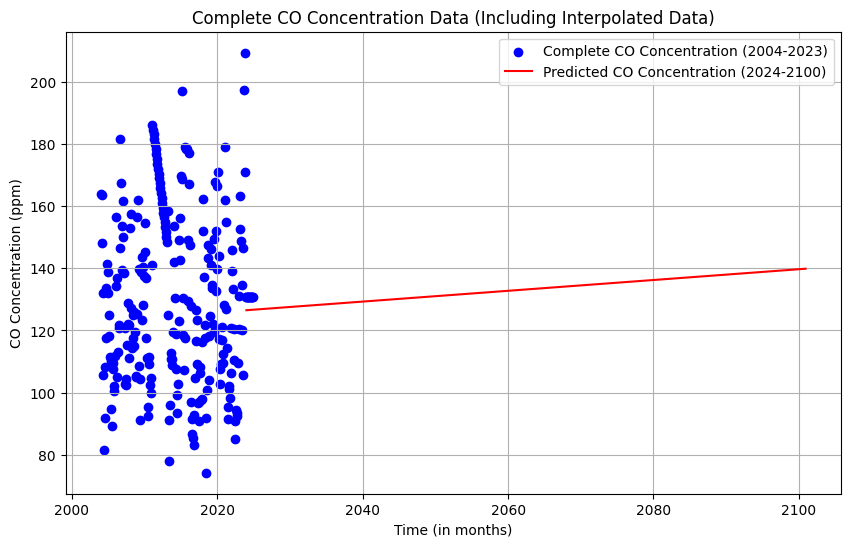

In [35]:
plt.figure(figsize=(10, 6))

plt.scatter(dtCO_full['time_in_months'], dtCO_full['value'], color='blue', label='Complete CO Concentration (2004-2023)', linestyle='-')

plt.plot(future_time_in_months, predicted_values, color='red', label='Predicted CO Concentration (2024-2100)', linestyle='-')  # Predictions

plt.xlabel('Time (in months)')
plt.ylabel('CO Concentration (ppm)')
plt.title('Complete CO Concentration Data (Including Interpolated Data)')
plt.legend()
plt.grid(True)

plt.show()

CO2

In [36]:
dtCO2 = pd.read_excel('CO2.xlsx')

In [37]:
dtCO2['time_in_months'] = dtCO2['year'] + (dtCO2['month'] - 1) / 12

In [38]:
modelCO2 = LinearRegression()

In [39]:
dtCO2['value'] = pd.to_numeric(dtCO2['value'], errors='coerce')

In [40]:
dtCO2 = dtCO2.dropna()

In [41]:
XCO2 = dtCO2[['time_in_months']]
yCO2 = dtCO2['value']

In [42]:
model.fit(XCO2, yCO2)

LinearRegression()

In [43]:
future_years = np.arange(2024, 2101)
future_months = np.arange(1, 13)

In [44]:
future_time_in_months = []
for year in future_years:
    for month in future_months:
        future_time_in_months.append(year + (month - 1) / 12)

future_time_in_months = np.array(future_time_in_months).reshape(-1, 1)

In [45]:
predicted_values = model.predict(future_time_in_months)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


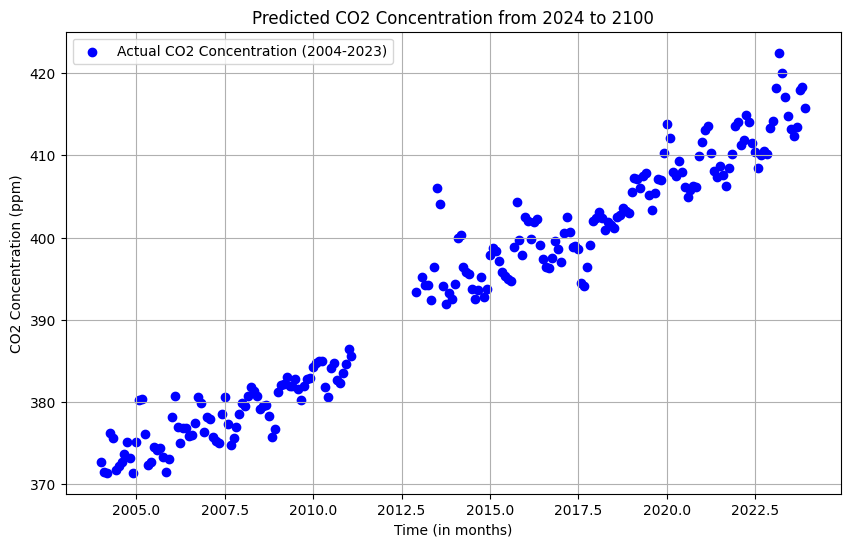

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(XCO2, yCO2, color='blue', label='Actual CO2 Concentration (2004-2023)', linestyle='-')  # Actual data points
plt.xlabel('Time (in months)')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Predicted CO2 Concentration from 2024 to 2100')
plt.legend()
plt.grid(True)
plt.show()

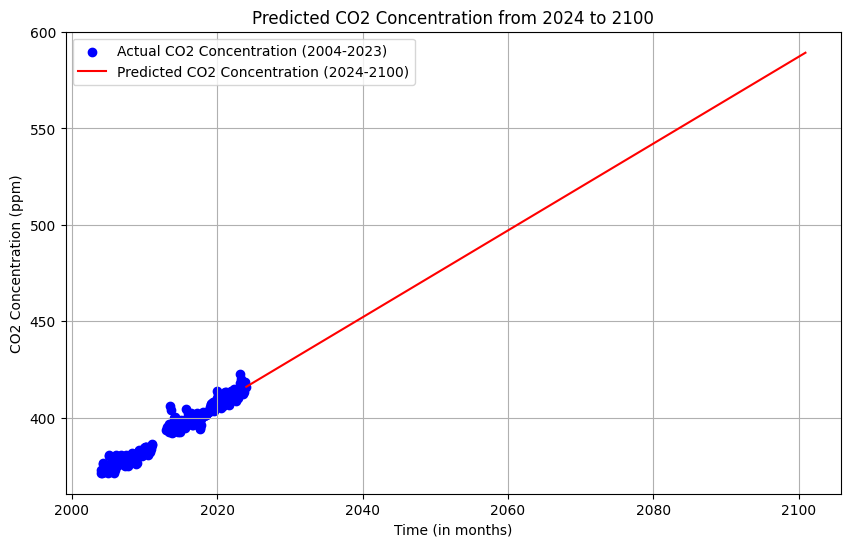

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(XCO2, yCO2, color='blue', label='Actual CO2 Concentration (2004-2023)', linestyle='-')  # Actual data points
plt.plot(future_time_in_months, predicted_values, color='red', label='Predicted CO2 Concentration (2024-2100)', linestyle='-')  # Predictions
plt.xlabel('Time (in months)')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Predicted CO2 Concentration from 2024 to 2100')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
last_predicted_value = predicted_values[-1]

print(f"The predicted CO2 concentration at the end of the data (year 2100) is: {last_predicted_value:.2f}")

The predicted CO2 concentration at the end of the data (year 2100) is: 589.31


Interpolation of CO2

In [49]:
full_years = np.arange(2004, 2025)
full_months = np.arange(1, 13)

full_range = pd.DataFrame([(year, month) for year in full_years for month in full_months], columns=['year', 'month'])

full_range['time_in_months'] = full_range['year'] + (full_range['month'] - 1) / 12

In [50]:
dtCO2_full = pd.merge(full_range, dtCO2[['year', 'month', 'time_in_months', 'value']], on=['year', 'month', 'time_in_months'], how='left')

dtCO2_full['value'] = dtCO2_full['value'].interpolate(method='linear')

dtCO2_full = dtCO2_full.dropna()

print(dtCO2_full[(dtCO2_full['year'] >= 2004) & (dtCO2_full['year'] <= 2014)])

     year  month  time_in_months   value
0    2004      1     2004.000000  372.75
1    2004      2     2004.083333  371.44
2    2004      3     2004.166667  371.43
3    2004      4     2004.250000  376.22
4    2004      5     2004.333333  375.69
..    ...    ...             ...     ...
127  2014      8     2014.583333  392.50
128  2014      9     2014.666667  393.63
129  2014     10     2014.750000  395.19
130  2014     11     2014.833333  392.72
131  2014     12     2014.916667  393.71

[132 rows x 4 columns]


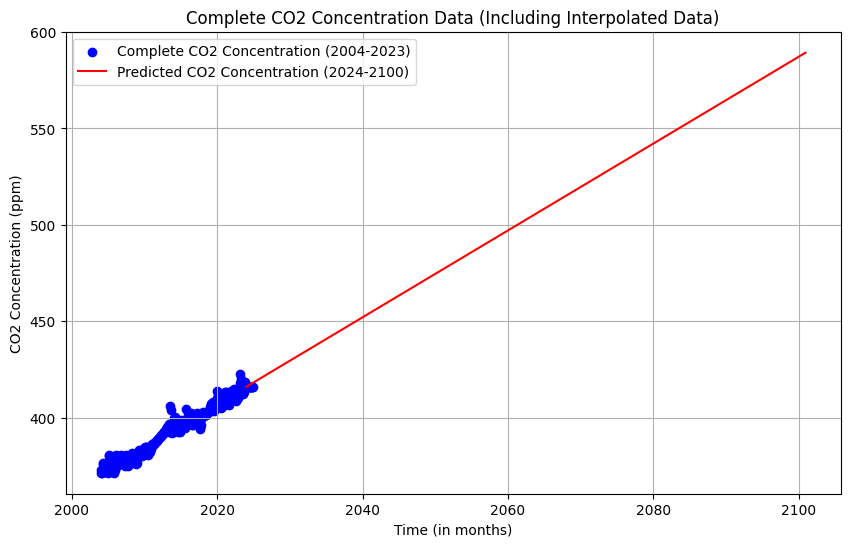

In [51]:
plt.figure(figsize=(10, 6))

plt.scatter(dtCO2_full['time_in_months'], dtCO2_full['value'], color='blue', label='Complete CO2 Concentration (2004-2023)', linestyle='-')

plt.plot(future_time_in_months, predicted_values, color='red', label='Predicted CO2 Concentration (2024-2100)', linestyle='-')  # Predictions

plt.xlabel('Time (in months)')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Complete CO2 Concentration Data (Including Interpolated Data)')
plt.legend()
plt.grid(True)

plt.show()

CO2C13

In [52]:
dtCO2C13 = pd.read_excel('CO2C13.xlsx')

In [53]:
dtCO2C13['time_in_months'] = dtCO2C13['year'] + (dtCO2C13['month'] - 1) / 12

In [54]:
modelCO2C13 = LinearRegression()

In [55]:
dtCO2C13['value'] = pd.to_numeric(dtCO2C13['value'], errors='coerce')

In [56]:
dtCO2C13 = dtCO2C13.dropna()

In [57]:
XCO2C13 = dtCO2C13[['time_in_months']]
yCO2C13 = dtCO2C13['value']

In [58]:
model.fit(XCO2C13, yCO2C13)

LinearRegression()

In [59]:
future_years = np.arange(2015, 2101)
future_months = np.arange(1, 13)

In [60]:
future_time_in_months = []
for year in future_years:
    for month in future_months:
        future_time_in_months.append(year + (month - 1) / 12)

future_time_in_months = np.array(future_time_in_months).reshape(-1, 1)

In [61]:
predicted_values = model.predict(future_time_in_months)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


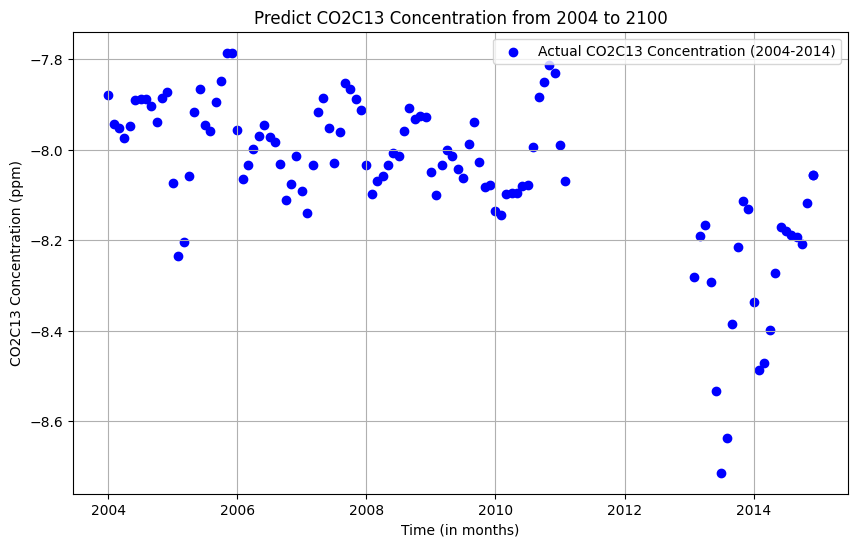

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(XCO2C13, yCO2C13, color='blue', label='Actual CO2C13 Concentration (2004-2014)', linestyle='-')  # Actual data points
plt.xlabel('Time (in months)')
plt.ylabel('CO2C13 Concentration (ppm)')
plt.title('Predict CO2C13 Concentration from 2004 to 2100')
plt.legend()
plt.grid(True)
plt.show()

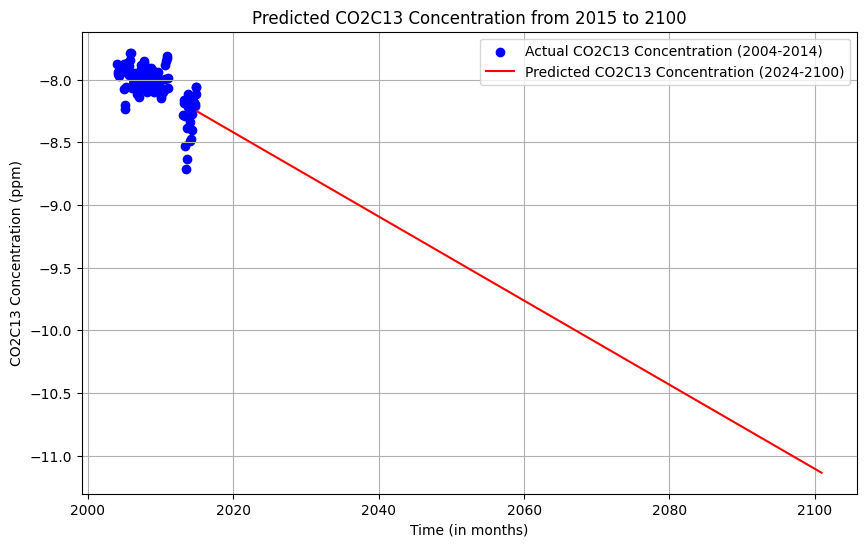

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(XCO2C13, yCO2C13, color='blue', label='Actual CO2C13 Concentration (2004-2014)', linestyle='-')  # Actual data points
plt.plot(future_time_in_months, predicted_values, color='red', label='Predicted CO2C13 Concentration (2024-2100)', linestyle='-')  # Predictions
plt.xlabel('Time (in months)')
plt.ylabel('CO2C13 Concentration (ppm)')
plt.title('Predicted CO2C13 Concentration from 2015 to 2100')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
last_predicted_value = predicted_values[-1]

print(f"The predicted CO2C13 concentration at the end of the data (year 2100) is: {last_predicted_value:.2f}")

The predicted CO2C13 concentration at the end of the data (year 2100) is: -11.14


Interpolation of CO2C13

In [65]:
full_years = np.arange(2004, 2015)
full_months = np.arange(1, 13)

full_range = pd.DataFrame([(year, month) for year in full_years for month in full_months], columns=['year', 'month'])

full_range['time_in_months'] = full_range['year'] + (full_range['month'] - 1) / 12

In [66]:
dtCO2C13_full = pd.merge(full_range, dtCO2C13[['year', 'month', 'time_in_months', 'value']], on=['year', 'month', 'time_in_months'], how='left')

dtCO2C13_full['value'] = dtCO2C13_full['value'].interpolate(method='linear')

dtCO2C13_full = dtCO2C13_full.dropna()

print(dtCO2C13_full[(dtCO2C13_full['year'] >= 2004) & (dtCO2C13_full['year'] <= 2014)])

     year  month  time_in_months  value
0    2004      1     2004.000000 -7.879
1    2004      2     2004.083333 -7.943
2    2004      3     2004.166667 -7.953
3    2004      4     2004.250000 -7.975
4    2004      5     2004.333333 -7.947
..    ...    ...             ...    ...
128  2014      9     2014.666667 -8.193
129  2014     10     2014.750000 -8.208
130  2014     11     2014.833333 -8.117
131  2014     12     2014.916667 -8.057
132  2014     12     2014.916667 -8.057

[133 rows x 4 columns]


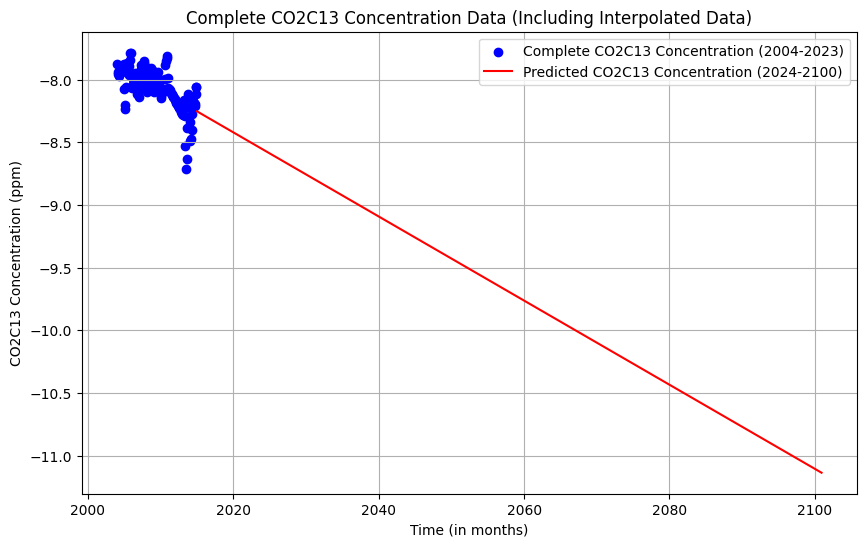

In [67]:
plt.figure(figsize=(10, 6))

plt.scatter(dtCO2C13_full['time_in_months'], dtCO2C13_full['value'], color='blue', label='Complete CO2C13 Concentration (2004-2023)', linestyle='-')

plt.plot(future_time_in_months, predicted_values, color='red', label='Predicted CO2C13 Concentration (2024-2100)', linestyle='-')  # Predictions

plt.xlabel('Time (in months)')
plt.ylabel('CO2C13 Concentration (ppm)')
plt.title('Complete CO2C13 Concentration Data (Including Interpolated Data)')
plt.legend()
plt.grid(True)

plt.show()

CO2O18

In [68]:
dtCO2O18 = pd.read_excel('CO2O18.xlsx')

In [69]:
dtCO2O18['time_in_months'] = dtCO2O18['year'] + (dtCO2O18['month'] - 1) / 12

In [70]:
modelCO2O18 = LinearRegression()

In [71]:
dtCO2O18['value'] = pd.to_numeric(dtCO2O18['value'], errors='coerce')

In [72]:
dtCO2O18 = dtCO2O18.dropna()

In [73]:
XCO2O18 = dtCO2O18[['time_in_months']]
yCO2O18 = dtCO2O18['value']

In [74]:
model.fit(XCO2O18, yCO2O18)

LinearRegression()

In [75]:
future_years = np.arange(2015, 2101)
future_months = np.arange(1, 13)

In [76]:
future_time_in_months = []
for year in future_years:
    for month in future_months:
        future_time_in_months.append(year + (month - 1) / 12)

future_time_in_months = np.array(future_time_in_months).reshape(-1, 1)

In [77]:
predicted_values = model.predict(future_time_in_months)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


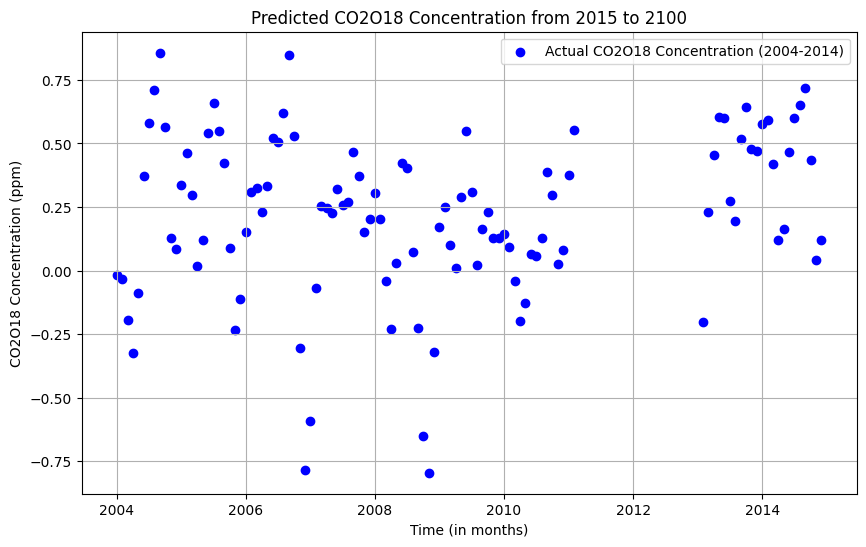

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(XCO2O18, yCO2O18, color='blue', label='Actual CO2O18 Concentration (2004-2014)', linestyle='-')  # Actual data points
plt.xlabel('Time (in months)')
plt.ylabel('CO2O18 Concentration (ppm)')
plt.title('Predicted CO2O18 Concentration from 2015 to 2100')
plt.legend()
plt.grid(True)
plt.show()

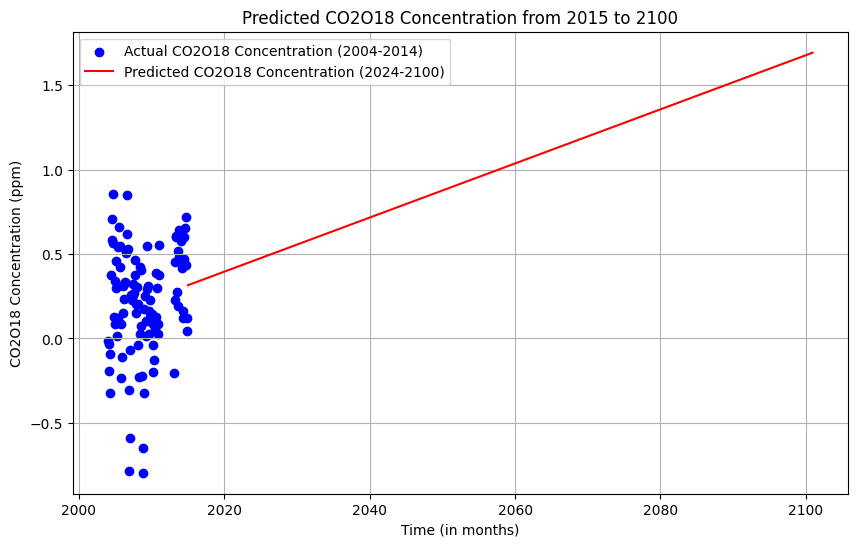

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(XCO2O18, yCO2O18, color='blue', label='Actual CO2O18 Concentration (2004-2014)', linestyle='-')  # Actual data points
plt.plot(future_time_in_months, predicted_values, color='red', label='Predicted CO2O18 Concentration (2024-2100)', linestyle='-')  # Predictions
plt.xlabel('Time (in months)')
plt.ylabel('CO2O18 Concentration (ppm)')
plt.title('Predicted CO2O18 Concentration from 2015 to 2100')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
last_predicted_value = predicted_values[-1]

print(f"The predicted CO2O18 concentration at the end of the data (year 2100) is: {last_predicted_value:.2f}")

The predicted CO2O18 concentration at the end of the data (year 2100) is: 1.69


Interpolation of CO2O18

In [81]:
full_years = np.arange(2004, 2015)
full_months = np.arange(1, 13)

full_range = pd.DataFrame([(year, month) for year in full_years for month in full_months], columns=['year', 'month'])

full_range['time_in_months'] = full_range['year'] + (full_range['month'] - 1) / 12

In [82]:
dtCO2O18_full = pd.merge(full_range, dtCO2O18[['year', 'month', 'time_in_months', 'value']], on=['year', 'month', 'time_in_months'], how='left')

dtCO2O18_full['value'] = dtCO2O18_full['value'].interpolate(method='linear')

dtCO2O18_full = dtCO2O18_full.dropna()

print(dtCO2O18_full[(dtCO2O18_full['year'] >= 2004) & (dtCO2O18_full['year'] <= 2014)])

     year  month  time_in_months  value
0    2004      1     2004.000000 -0.016
1    2004      2     2004.083333 -0.033
2    2004      3     2004.166667 -0.194
3    2004      4     2004.250000 -0.323
4    2004      5     2004.333333 -0.090
..    ...    ...             ...    ...
127  2014      8     2014.583333  0.653
128  2014      9     2014.666667  0.719
129  2014     10     2014.750000  0.434
130  2014     11     2014.833333  0.043
131  2014     12     2014.916667  0.121

[132 rows x 4 columns]


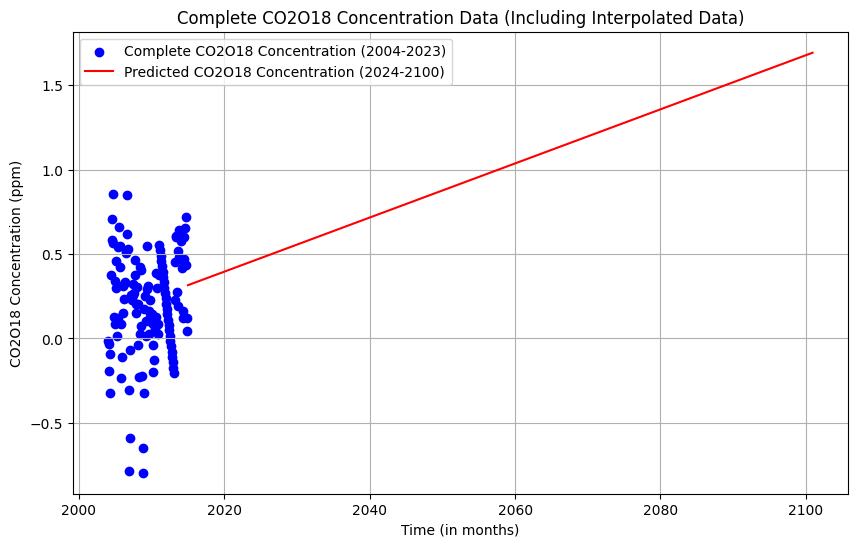

In [83]:
plt.figure(figsize=(10, 6))

plt.scatter(dtCO2O18_full['time_in_months'], dtCO2O18_full['value'], color='blue', label='Complete CO2O18 Concentration (2004-2023)', linestyle='-')

plt.plot(future_time_in_months, predicted_values, color='red', label='Predicted CO2O18 Concentration (2024-2100)', linestyle='-')  # Predictions

plt.xlabel('Time (in months)')
plt.ylabel('CO2O18 Concentration (ppm)')
plt.title('Complete CO2O18 Concentration Data (Including Interpolated Data)')
plt.legend()
plt.grid(True)

plt.show()

H2

In [84]:
dtH2 = pd.read_excel('H2.xlsx')

In [85]:
dtH2['time_in_months'] = dtH2['year'] + (dtH2['month'] - 1) / 12

In [86]:
modelH2 = LinearRegression()

In [87]:
dtH2['value'] = pd.to_numeric(dtH2['value'], errors='coerce')

In [88]:
dtH2 = dtH2.dropna()

In [89]:
XH2 = dtH2[['time_in_months']]
yH2 = dtH2['value']

In [90]:
model.fit(XH2, yH2)

LinearRegression()

In [91]:
future_years = np.arange(2024, 2101)
future_months = np.arange(1, 13)

In [92]:
future_time_in_months = []
for year in future_years:
    for month in future_months:
        future_time_in_months.append(year + (month - 1) / 12)

future_time_in_months = np.array(future_time_in_months).reshape(-1, 1)

In [93]:
predicted_values = model.predict(future_time_in_months)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


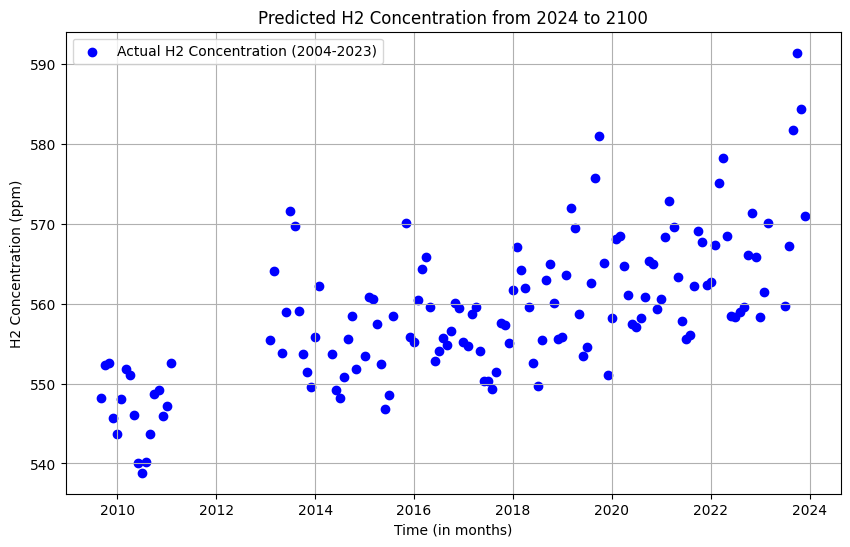

In [94]:
plt.figure(figsize=(10, 6))
plt.scatter(XH2, yH2, color='blue', label='Actual H2 Concentration (2004-2023)', linestyle='-')  # Actual data points
plt.xlabel('Time (in months)')
plt.ylabel('H2 Concentration (ppm)')
plt.title('Predicted H2 Concentration from 2024 to 2100')
plt.legend()
plt.grid(True)
plt.show()

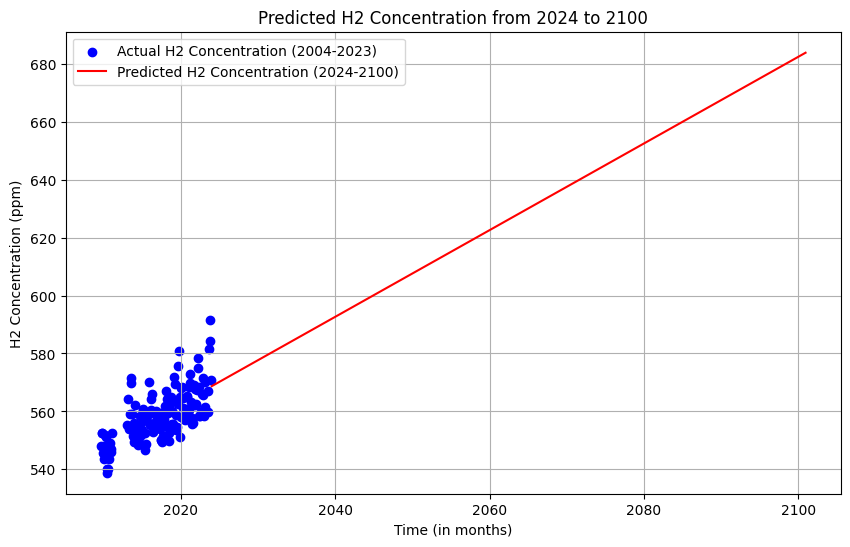

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(XH2, yH2, color='blue', label='Actual H2 Concentration (2004-2023)', linestyle='-')  # Actual data points
plt.plot(future_time_in_months, predicted_values, color='red', label='Predicted H2 Concentration (2024-2100)', linestyle='-')  # Predictions
plt.xlabel('Time (in months)')
plt.ylabel('H2 Concentration (ppm)')
plt.title('Predicted H2 Concentration from 2024 to 2100')
plt.legend()
plt.grid(True)
plt.show()

In [96]:
last_predicted_value = predicted_values[-1]

print(f"The predicted H2 concentration at the end of the data (year 2100) is: {last_predicted_value:.2f}")

The predicted H2 concentration at the end of the data (year 2100) is: 683.78


Interpolation of H2

In [97]:
full_years = np.arange(2004, 2025)
full_months = np.arange(1, 13)

full_range = pd.DataFrame([(year, month) for year in full_years for month in full_months], columns=['year', 'month'])

full_range['time_in_months'] = full_range['year'] + (full_range['month'] - 1) / 12

In [98]:
dtH2_full = pd.merge(full_range, dtH2[['year', 'month', 'time_in_months', 'value']], on=['year', 'month', 'time_in_months'], how='left')

dtH2_full['value'] = dtH2_full['value'].interpolate(method='linear')

dtH2_full = dtH2_full.dropna()

print(dtH2_full[(dtH2_full['year'] >= 2004) & (dtH2_full['year'] <= 2014)])

     year  month  time_in_months    value
68   2009      9     2009.666667  548.170
69   2009     10     2009.750000  552.380
70   2009     11     2009.833333  552.630
71   2009     12     2009.916667  545.710
72   2010      1     2010.000000  543.660
..    ...    ...             ...      ...
127  2014      8     2014.583333  550.810
128  2014      9     2014.666667  555.580
129  2014     10     2014.750000  558.440
130  2014     11     2014.833333  551.830
131  2014     12     2014.916667  552.635

[64 rows x 4 columns]


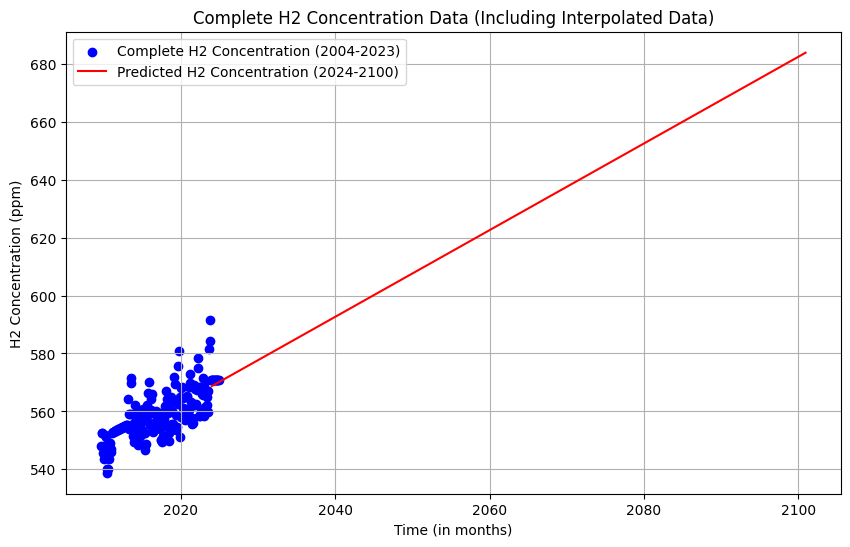

In [99]:
plt.figure(figsize=(10, 6))

plt.scatter(dtH2_full['time_in_months'], dtH2_full['value'], color='blue', label='Complete H2 Concentration (2004-2023)', linestyle='-')

plt.plot(future_time_in_months, predicted_values, color='red', label='Predicted H2 Concentration (2024-2100)', linestyle='-')  # Predictions

plt.xlabel('Time (in months)')
plt.ylabel('H2 Concentration (ppm)')
plt.title('Complete H2 Concentration Data (Including Interpolated Data)')
plt.legend()
plt.grid(True)

plt.show()

N2O

In [100]:
dtN2O = pd.read_excel('N2O.xlsx')

In [101]:
dtN2O['time_in_months'] = dtN2O['year'] + (dtN2O['month'] - 1) / 12

In [102]:
modelN2O = LinearRegression()

In [103]:
dtN2O['value'] = pd.to_numeric(dtN2O['value'], errors='coerce')

In [104]:
dtN2O = dtN2O.dropna()

In [105]:
XN2O = dtN2O[['time_in_months']]
yN2O = dtN2O['value']

In [106]:
model.fit(XN2O, yN2O)

LinearRegression()

In [107]:
future_years = np.arange(2024, 2101)
future_months = np.arange(1, 13)

In [108]:
future_time_in_months = []
for year in future_years:
    for month in future_months:
        future_time_in_months.append(year + (month - 1) / 12)

future_time_in_months = np.array(future_time_in_months).reshape(-1, 1)

In [109]:
predicted_values = model.predict(future_time_in_months)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


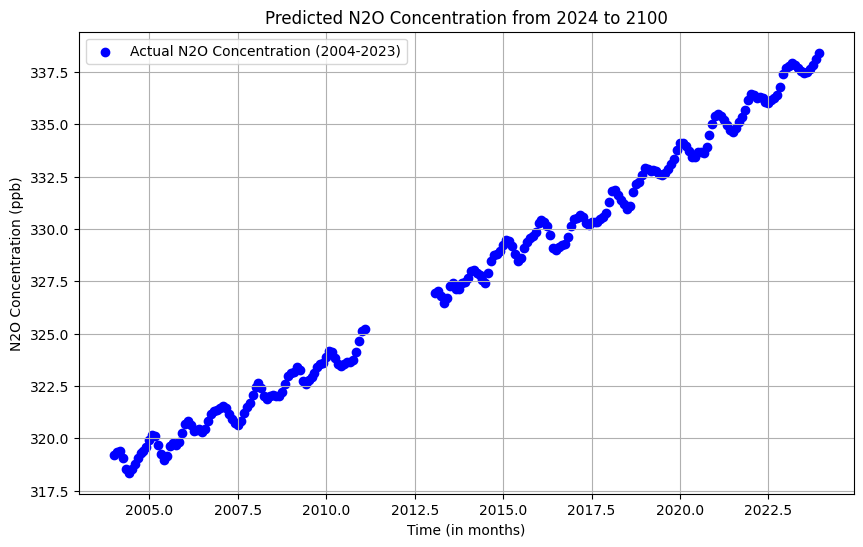

In [110]:
plt.figure(figsize=(10, 6))
plt.scatter(XN2O, yN2O, color='blue', label='Actual N2O Concentration (2004-2023)', linestyle='-')  # Actual data points
plt.xlabel('Time (in months)')
plt.ylabel('N2O Concentration (ppb)')
plt.title('Predicted N2O Concentration from 2024 to 2100')
plt.legend()
plt.grid(True)
plt.show()

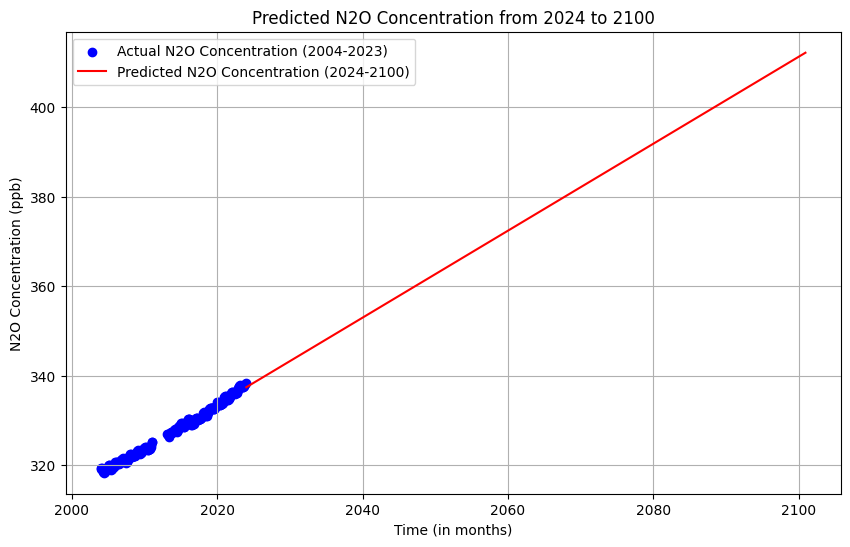

In [111]:
plt.figure(figsize=(10, 6))
plt.scatter(XN2O, yN2O, color='blue', label='Actual N2O Concentration (2004-2023)', linestyle='-')  # Actual data points
plt.plot(future_time_in_months, predicted_values, color='red', label='Predicted N2O Concentration (2024-2100)', linestyle='-')  # Predictions
plt.xlabel('Time (in months)')
plt.ylabel('N2O Concentration (ppb)')
plt.title('Predicted N2O Concentration from 2024 to 2100')
plt.legend()
plt.grid(True)
plt.show()

In [112]:
last_predicted_value = predicted_values[-1]

print(f"The predicted N2O concentration at the end of the data (year 2100) is: {last_predicted_value:.2f}")

The predicted N2O concentration at the end of the data (year 2100) is: 412.17


Interpolation of N2O

In [113]:
full_years = np.arange(2004, 2025)
full_months = np.arange(1, 13)

full_range = pd.DataFrame([(year, month) for year in full_years for month in full_months], columns=['year', 'month'])

full_range['time_in_months'] = full_range['year'] + (full_range['month'] - 1) / 12

In [114]:
dtN2O_full = pd.merge(full_range, dtN2O[['year', 'month', 'time_in_months', 'value']], on=['year', 'month', 'time_in_months'], how='left')

dtN2O_full['value'] = dtN2O_full['value'].interpolate(method='linear')

dtN2O_full = dtN2O_full.dropna()

print(dtN2O_full[(dtN2O_full['year'] >= 2004) & (dtN2O_full['year'] <= 2014)])

     year  month  time_in_months   value
0    2004      1     2004.000000  319.21
1    2004      2     2004.083333  319.35
2    2004      3     2004.166667  319.39
3    2004      4     2004.250000  319.08
4    2004      5     2004.333333  318.53
..    ...    ...             ...     ...
127  2014      8     2014.583333  327.90
128  2014      9     2014.666667  328.49
129  2014     10     2014.750000  328.76
130  2014     11     2014.833333  328.79
131  2014     12     2014.916667  328.93

[132 rows x 4 columns]


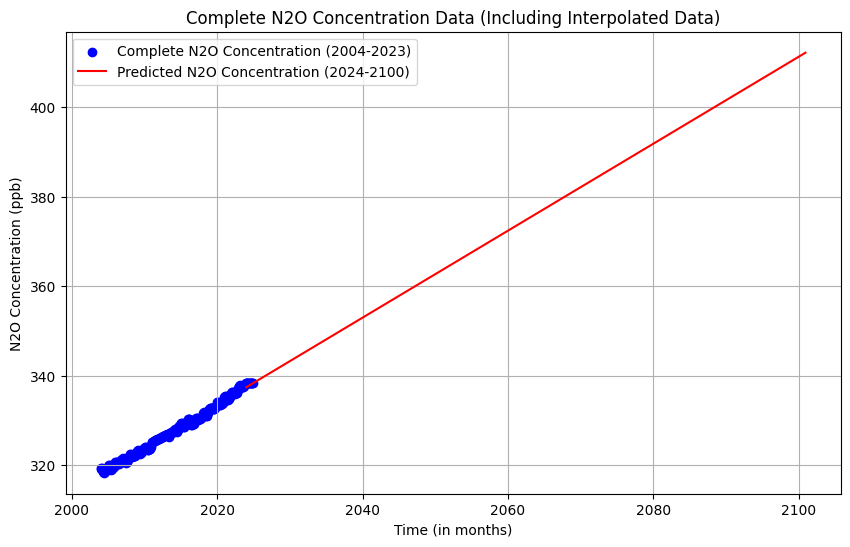

In [115]:
plt.figure(figsize=(10, 6))

plt.scatter(dtN2O_full['time_in_months'], dtN2O_full['value'], color='blue', label='Complete N2O Concentration (2004-2023)', linestyle='-')

plt.plot(future_time_in_months, predicted_values, color='red', label='Predicted N2O Concentration (2024-2100)', linestyle='-')  # Predictions

plt.xlabel('Time (in months)')
plt.ylabel('N2O Concentration (ppb)')
plt.title('Complete N2O Concentration Data (Including Interpolated Data)')
plt.legend()
plt.grid(True)

plt.show()

SF6

In [116]:
dtSF6 = pd.read_excel('SF6.xlsx')

In [117]:
dtSF6['time_in_months'] = dtSF6['year'] + (dtSF6['month'] - 1) / 12

In [118]:
modelSF6 = LinearRegression()

In [119]:
dtSF6['value'] = pd.to_numeric(dtSF6['value'], errors='coerce')

In [120]:
dtSF6 = dtSF6.dropna()

In [121]:
XSF6 = dtSF6[['time_in_months']]
ySF6 = dtSF6['value']

In [122]:
model.fit(XSF6, ySF6)

LinearRegression()

In [123]:
future_years = np.arange(2024, 2101)
future_months = np.arange(1, 13)

In [124]:
future_time_in_months = []
for year in future_years:
    for month in future_months:
        future_time_in_months.append(year + (month - 1) / 12)

future_time_in_months = np.array(future_time_in_months).reshape(-1, 1)

In [125]:
predicted_values = model.predict(future_time_in_months)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


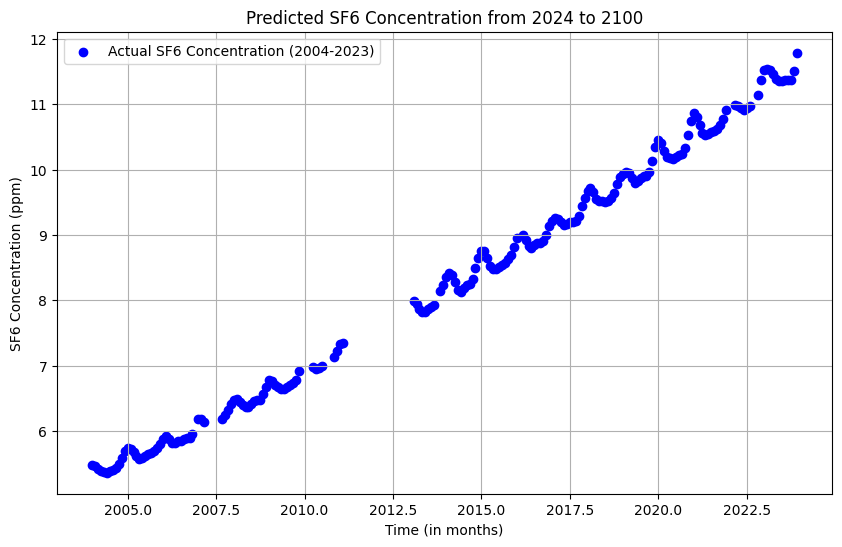

In [126]:
plt.figure(figsize=(10, 6))
plt.scatter(XSF6, ySF6, color='blue', label='Actual SF6 Concentration (2004-2023)', linestyle='-')  # Actual data points
plt.xlabel('Time (in months)')
plt.ylabel('SF6 Concentration (ppm)')
plt.title('Predicted SF6 Concentration from 2024 to 2100')
plt.legend()
plt.grid(True)
plt.show()

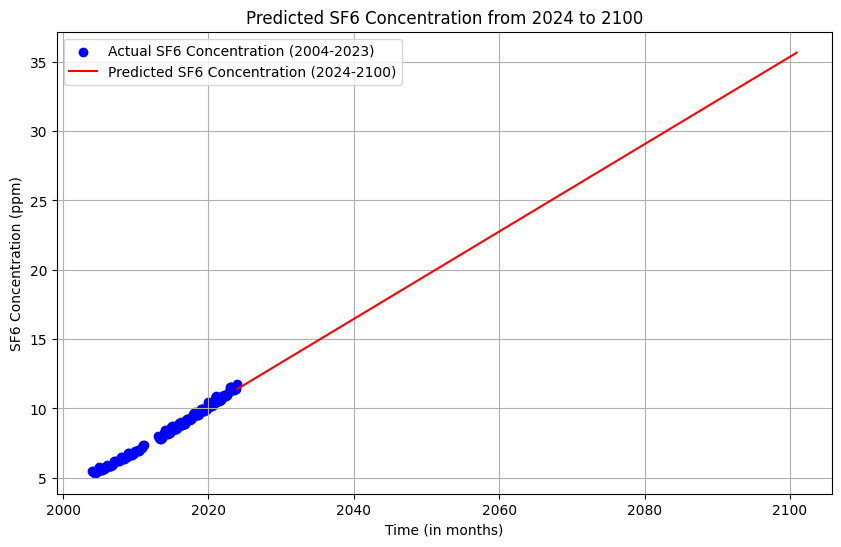

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(XSF6, ySF6, color='blue', label='Actual SF6 Concentration (2004-2023)', linestyle='-')  # Actual data points
plt.plot(future_time_in_months, predicted_values, color='red', label='Predicted SF6 Concentration (2024-2100)', linestyle='-')  # Predictions
plt.xlabel('Time (in months)')
plt.ylabel('SF6 Concentration (ppm)')
plt.title('Predicted SF6 Concentration from 2024 to 2100')
plt.legend()
plt.grid(True)
plt.show()

In [128]:
last_predicted_value = predicted_values[-1]

print(f"The predicted SF6 concentration at the end of the data (year 2100) is: {last_predicted_value:.2f}")

The predicted SF6 concentration at the end of the data (year 2100) is: 35.66


Interpolation of SF6

In [129]:
full_years = np.arange(2004, 2025)
full_months = np.arange(1, 13)

full_range = pd.DataFrame([(year, month) for year in full_years for month in full_months], columns=['year', 'month'])

full_range['time_in_months'] = full_range['year'] + (full_range['month'] - 1) / 12

In [130]:
dtSF6_full = pd.merge(full_range, dtSF6[['year', 'month', 'time_in_months', 'value']], on=['year', 'month', 'time_in_months'], how='left')

dtSF6_full['value'] = dtSF6_full['value'].interpolate(method='linear')

dtSF6_full = dtSF6_full.dropna()

print(dtSF6_full[(dtSF6_full['year'] >= 2004) & (dtSF6_full['year'] <= 2014)])

     year  month  time_in_months  value
0    2004      1     2004.000000   5.48
1    2004      2     2004.083333   5.46
2    2004      3     2004.166667   5.41
3    2004      4     2004.250000   5.39
4    2004      5     2004.333333   5.37
..    ...    ...             ...    ...
127  2014      8     2014.583333   8.23
128  2014      9     2014.666667   8.25
129  2014     10     2014.750000   8.32
130  2014     11     2014.833333   8.49
131  2014     12     2014.916667   8.64

[132 rows x 4 columns]


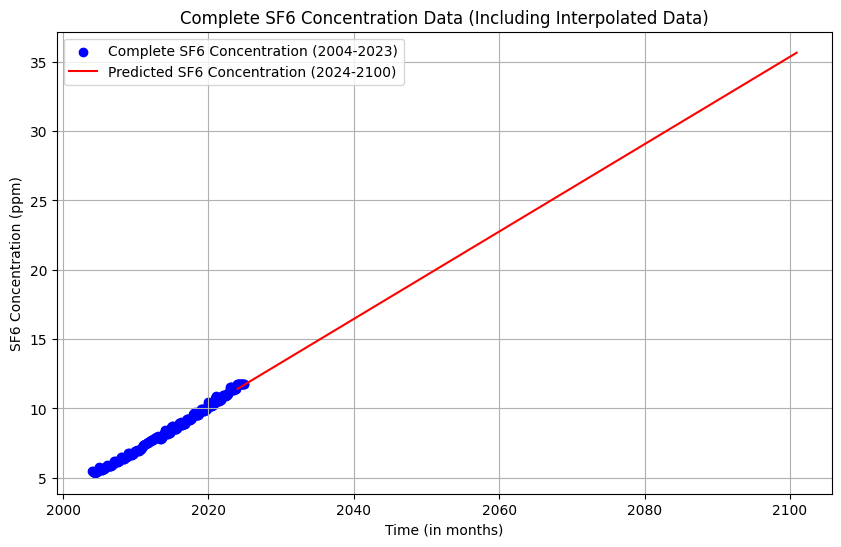

In [131]:
plt.figure(figsize=(10, 6))

plt.scatter(dtSF6_full['time_in_months'], dtSF6_full['value'], color='blue', label='Complete SF6 Concentration (2004-2023)', linestyle='-')

plt.plot(future_time_in_months, predicted_values, color='red', label='Predicted SF6 Concentration (2024-2100)', linestyle='-')  # Predictions

plt.xlabel('Time (in months)')
plt.ylabel('SF6 Concentration (ppm)')
plt.title('Complete SF6 Concentration Data (Including Interpolated Data)')
plt.legend()
plt.grid(True)

plt.show()

Combined Plot

In [132]:
def predict_ghg(file_name, ghg_name):
    data = pd.read_excel(file_name)

    data['time_in_months'] = data['year'] + (data['month'] - 1) / 12

    data['value'] = pd.to_numeric(data['value'], errors='coerce')
    data = data.dropna()

    X = data[['time_in_months']]
    y = data['value']

    model = LinearRegression()
    model.fit(X, y)

    future_years = np.arange(2024, 2101)
    future_months = np.arange(1, 13)
    future_time_in_months = []
    for year in future_years:
        for month in future_months:
            future_time_in_months.append(year + (month - 1) / 12)
    future_time_in_months = np.array(future_time_in_months).reshape(-1, 1)

    predicted_values = model.predict(future_time_in_months)

    return data['time_in_months'], data['value'], future_time_in_months, predicted_values

In [133]:
ghg_files = {
    'SF6.xlsx': 'SF6 (ppm)',
    'CH4.xlsx': 'CH4 (ppb)',
    'CO.xlsx': 'CO (ppm)',
    'CO2.xlsx': 'CO2 (ppm)',
    'CO2C13.xlsx': 'CO2C13 (ppm)',
    'CO2O18.xlsx': 'CO2O18 (ppm)',
    'H2.xlsx': 'H2 (ppm)',
    'N2O.xlsx': 'N2O (ppb)'
}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature n

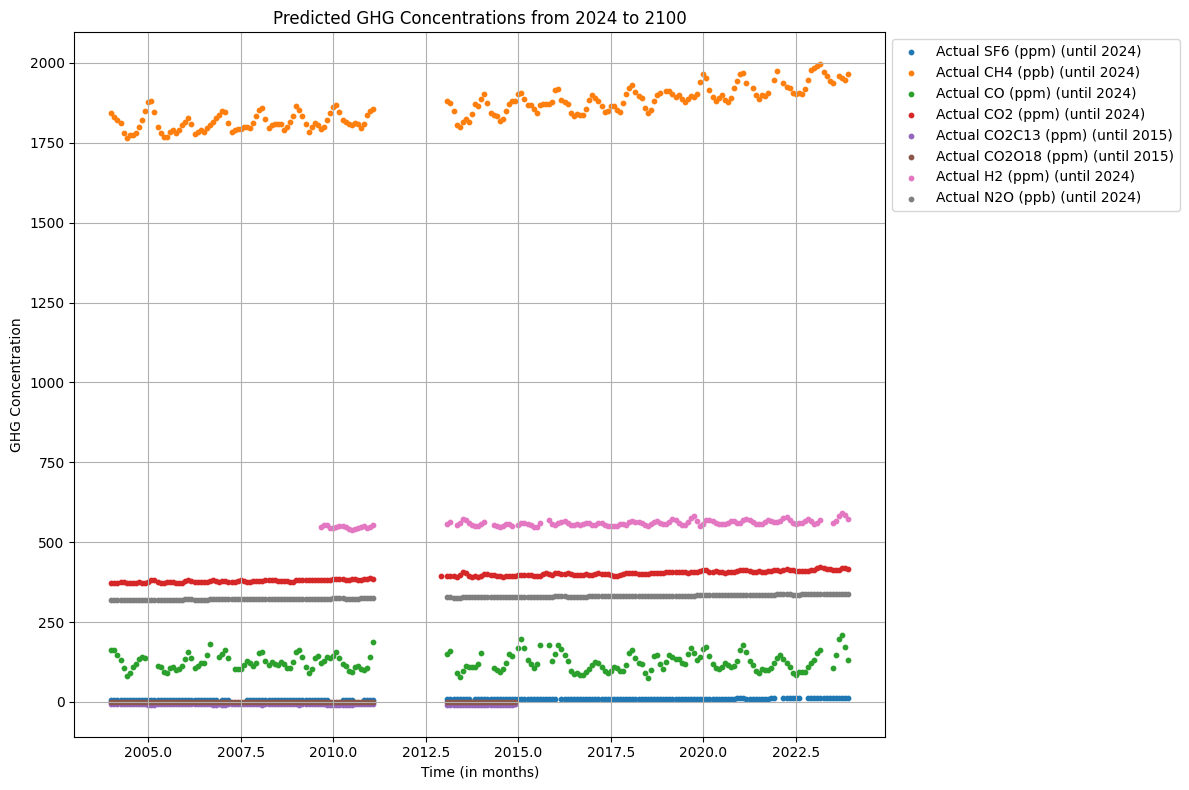

In [134]:
plt.figure(figsize=(12, 8))
for file_name, ghg_name in ghg_files.items():
    actual_time, actual_value, future_time, predicted_value = predict_ghg(file_name, ghg_name)

    plt.scatter(actual_time, actual_value, label=f'Actual {ghg_name} (until {actual_time.iloc[-1]:.0f})', s=10, linestyle='-')

plt.xlabel('Time (in months)')
plt.ylabel('GHG Concentration')
plt.title('Predicted GHG Concentrations from 2024 to 2100')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature n

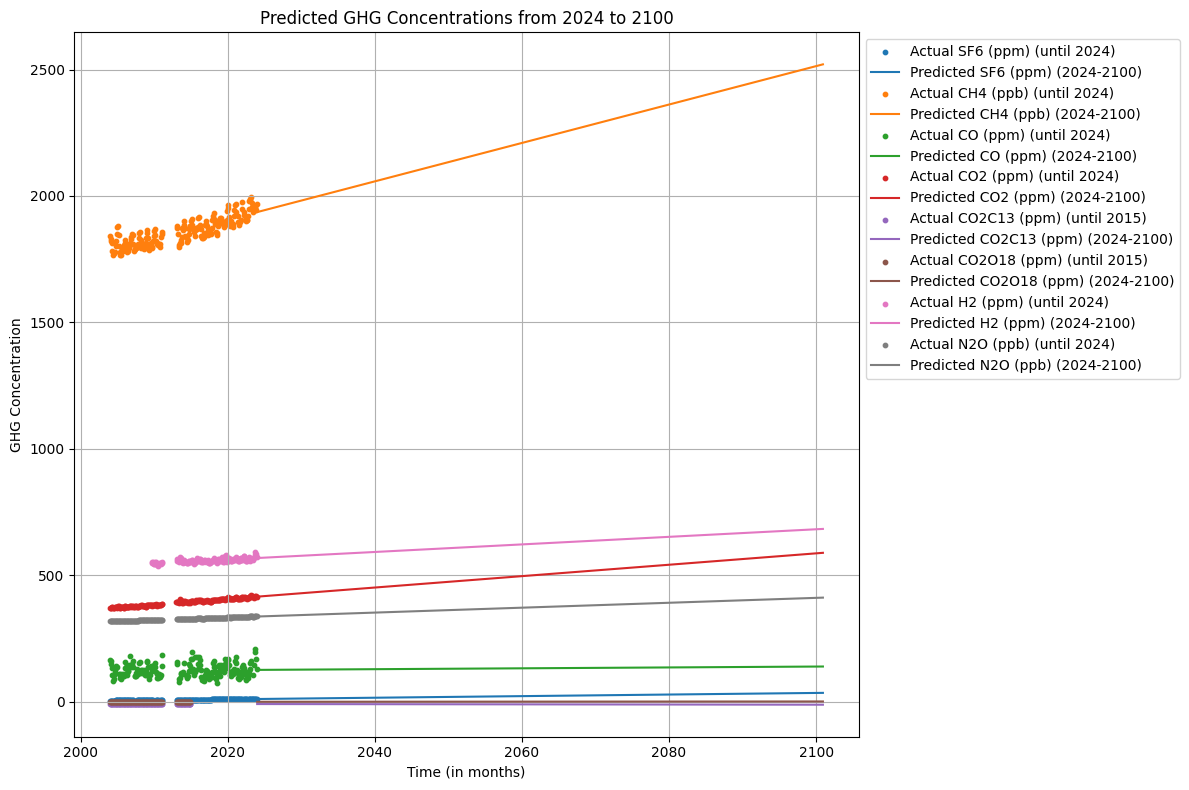

In [135]:
plt.figure(figsize=(12, 8))
for file_name, ghg_name in ghg_files.items():
    actual_time, actual_value, future_time, predicted_value = predict_ghg(file_name, ghg_name)

    plt.scatter(actual_time, actual_value, label=f'Actual {ghg_name} (until {actual_time.iloc[-1]:.0f})', s=10, linestyle='-')

    plt.plot(future_time, predicted_value, label=f'Predicted {ghg_name} (2024-2100)', linestyle='-')

plt.xlabel('Time (in months)')
plt.ylabel('GHG Concentration')
plt.title('Predicted GHG Concentrations from 2024 to 2100')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.tight_layout()
plt.show()

In [136]:
def process_ghg_data(file, label):
    data = pd.read_excel(file)

    data['value'] = pd.to_numeric(data['value'], errors='coerce')

    data['time_in_months'] = data['year'] + (data['month'] - 1) / 12

    full_years = np.arange(2011, 2014)
    full_months = np.arange(1, 13)
    full_range = pd.DataFrame([(year, month) for year in full_years for month in full_months], columns=['year', 'month'])
    full_range['time_in_months'] = full_range['year'] + (full_range['month'] - 1) / 12

    full_data = pd.merge(full_range, data[['year', 'month', 'time_in_months', 'value']], on=['year', 'month', 'time_in_months'], how='left')

    full_data['value'] = full_data['value'].interpolate(method='linear')

    full_data = full_data.dropna()

    combined_data = pd.concat([data[data['year'] < 2011], full_data, data[data['year'] > 2013]], ignore_index=True)
    combined_data = combined_data.dropna()
    X = combined_data[['time_in_months']]
    y = combined_data['value']

    model = LinearRegression()
    model.fit(X, y)

    future_years = np.arange(2024, 2101)
    future_months = np.arange(1, 13)
    future_time_in_months = []
    for year in future_years:
        for month in future_months:
            future_time_in_months.append(year + (month - 1) / 12)

    future_time_in_months = np.array(future_time_in_months).reshape(-1, 1)

    predicted_values = model.predict(future_time_in_months)

    future_data = pd.DataFrame({
        'year': np.repeat(future_years, 12),
        'month': np.tile(np.arange(1, 13), len(future_years)),
        'time_in_months': future_time_in_months.flatten(),
        'value': predicted_values
    })

    complete_data = pd.concat([combined_data, future_data], ignore_index=True)

    return complete_data, label

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature n

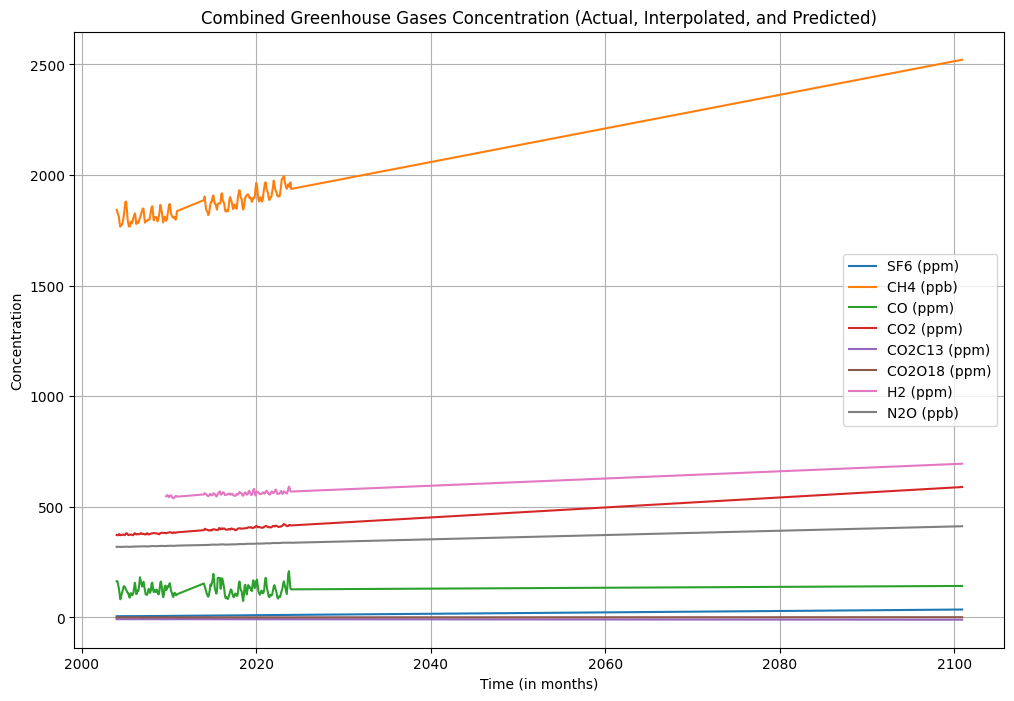

In [137]:
plt.figure(figsize=(12, 8))

for file, label in ghg_files.items():
    ghg_data, gas_label = process_ghg_data(file, label)

    plt.plot(ghg_data['time_in_months'], ghg_data['value'], label=gas_label)

plt.xlabel('Time (in months)')
plt.ylabel('Concentration')
plt.title('Combined Greenhouse Gases Concentration (Actual, Interpolated, and Predicted)')
plt.legend()
plt.grid(True)

plt.show()


Correlation

In [138]:
dtSF6 = dtSF6[['year', 'month', 'value']].rename(columns={'value': 'SF6'})
dtCH4 = dtCH4[['year', 'month', 'value']].rename(columns={'value': 'CH4'})
dtCO = dtCO[['year', 'month', 'value']].rename(columns={'value': 'CO'})
dtCO2 = dtCO2[['year', 'month', 'value']].rename(columns={'value': 'CO2'})
dtCO2C13 = dtCO2C13[['year', 'month', 'value']].rename(columns={'value': 'CO2C13'})
dtCO2O18 = dtCO2O18[['year', 'month', 'value']].rename(columns={'value': 'CO2O18'})
dtH2 = dtH2[['year', 'month', 'value']].rename(columns={'value': 'H2'})
dtN2O = dtN2O[['year', 'month', 'value']].rename(columns={'value': 'N2O'})

In [139]:
dtSF6 = dtSF6.dropna()
dtCH4 = dtCH4.dropna()
dtCO = dtCO.dropna()
dtCO2 = dtCO2.dropna()
dtCO2C13 = dtCO2C13.dropna()
dtCO2O18 = dtCO2O18.dropna()
dtH2 = dtH2.dropna()
dtN2O = dtN2O.dropna()

In [140]:
merged_data = dtSF6.merge(dtCH4, on=['year', 'month'], how='outer') \
                   .merge(dtCO, on=['year', 'month'], how='outer') \
                   .merge(dtCO2, on=['year', 'month'], how='outer') \
                   .merge(dtCO2C13, on=['year', 'month'], how='outer') \
                   .merge(dtCO2O18, on=['year', 'month'], how='outer') \
                   .merge(dtH2, on=['year', 'month'], how='outer') \
                   .merge(dtN2O, on=['year', 'month'], how='outer')

In [141]:
merged_data = merged_data.dropna()

In [142]:
correlation_matrix = merged_data[['SF6', 'CH4', 'CO', 'CO2', 'CO2C13', 'CO2O18', 'H2', 'N2O']].corr()

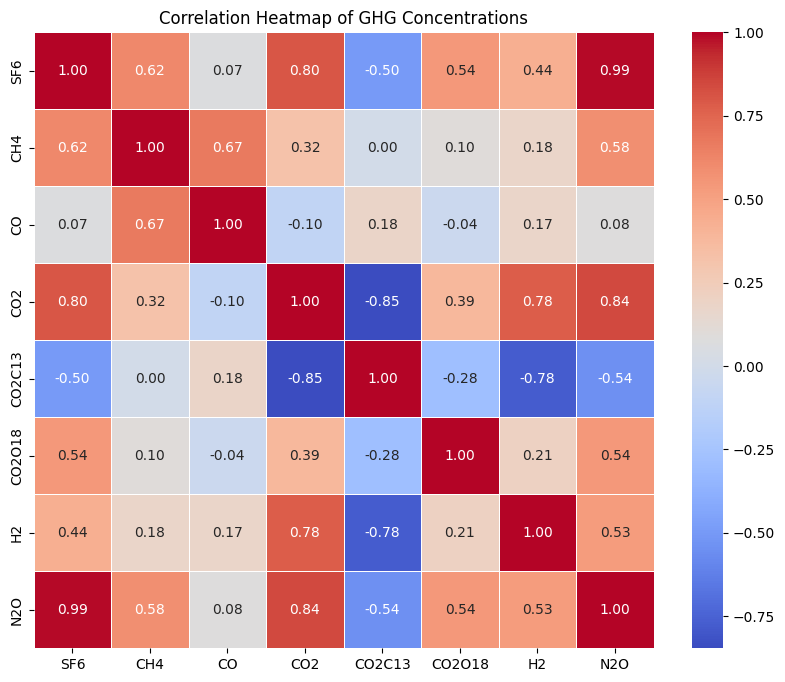

In [143]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of GHG Concentrations')
plt.show()

SF6, a potent GHG, shows a very high correlation with N2O (0.99), indicating that their concentrations tend to move together almost perfectly over time. This strong relationship can be seen as reflective of common industrial sources, as both gases are used in applications such as electrical insulation and agriculture (Giannelos et al., 2024). The high positive correlation between SF6 and CO2 (0.80), another major contributor to climate change, suggests shared anthropogenic sources, possibly linked to energy and manufacturing sectors, which are known to contribute significantly to rising GHG concentrations (Hoegh-Guldberg et al., 2019).

A moderately strong positive correlation between SF6 and CH4 (0.62) suggests some shared emissions sources or atmospheric processes that affect both gases, albeit to a lesser degree compared to N2O or CO2. These correlations imply that industrial practices contributing to SF6 emissions may also impact methane emissions, a potent short-lived climate pollutant (Ramanswamy et al., 1991).

The positive correlation of SF6 with CO2O18 (0.54) further indicates some atmospheric interaction or shared processes between these gases, though the relationship is weaker compared to N2O and CO2. Similarly, the weak to moderate correlation between SF6 and H2 (0.44) shows a weaker connection, potentially pointing to different emission sources or atmospheric dynamics influencing hydrogen concentrations (Lindsey & Dahlman, 2020).

Conversely, the moderate negative correlation of SF6 with CO2C13 (-0.50) reflects an opposing trend, suggesting that when SF6 concentrations increase, CO2C13 levels decrease. This may be related to distinct isotopic fractionation processes that govern these gases or different sources of emissions, as CO2C13 often reflects isotopic signatures from biological processes rather than industrial activities (Sherwood et al., 2020).

Additional Correlations
CH4 shows a moderately strong correlation with CO (0.67), suggesting that their behaviors are somewhat aligned, likely due to common sources such as fossil fuel combustion and biomass burning (Poortinga et al., 2019).
CO exhibits weaker correlations with other GHGs, such as H2 (0.17) and CO2C13 (0.18), suggesting it plays a more isolated role in atmospheric chemistry, with fewer direct interactions with other gases (Hoegh-Guldberg et al., 2019).
CO2 and H2 have a strong positive correlation (0.78), indicating that increases in CO2 are often accompanied by increases in H2, which may point to shared industrial or combustion-related sources (Rugenstein et al., 2019).
These correlations reflect the complex interactions among GHGs and their shared or distinct sources. Understanding these relationships is crucial for predicting future emission trends and informing policy measures aimed at reducing GHG concentrations in line with global climate goals, such as limiting warming to 1.5°C (Hoegh-Guldberg et al., 2019).

In [144]:
dtCO2 = pd.read_excel('CO2.xlsx')
dtCH4 = pd.read_excel('CH4.xlsx')
dtN2O = pd.read_excel('N2O.xlsx')
dtSF6 = pd.read_excel('SF6.xlsx')
dtCO = pd.read_excel('CO.xlsx')
dtH2 = pd.read_excel('H2.xlsx')
dtCO2O18 = pd.read_excel('CO2O18.xlsx')

In [145]:
dtCH4.drop(columns=['site'])
dtCO2.drop(columns=['site'])
dtSF6.drop(columns=['site'])
dtCO.drop(columns=['site'])
dtH2.drop(columns=['site'])
dtN2O.drop(columns=['site'])
dtCO2O18.drop(columns=['site'])

,year,month,value
0,2004,1,-0.016
1,2004,2,-0.033
2,2004,3,-0.194
3,2004,4,-0.323
4,2004,5,-0.090
...,...,...,...
104,2014,8,0.653
105,2014,9,0.719
106,2014,10,0.434
107,2014,11,0.043


In [146]:
dtCH4['datetime'] = pd.to_datetime(dtCH4[['year', 'month']].assign(day=1))
dtCO2['datetime'] = pd.to_datetime(dtCO2[['year', 'month']].assign(day=1))
dtSF6['datetime'] = pd.to_datetime(dtSF6[['year', 'month']].assign(day=1))
dtCO['datetime'] = pd.to_datetime(dtCO[['year', 'month']].assign(day=1))
dtH2['datetime'] = pd.to_datetime(dtH2[['year', 'month']].assign(day=1))
dtN2O['datetime'] = pd.to_datetime(dtN2O[['year', 'month']].assign(day=1))
dtCO2O18['datetime'] = pd.to_datetime(dtCO2O18[['year', 'month']].assign(day=1))

In [147]:
dtSF6 = dtSF6.dropna()
dtCH4 = dtCH4.dropna()
dtCO = dtCO.dropna()
dtCO2 = dtCO2.dropna()
dtCO2O18 = dtCO2O18.dropna()
dtH2 = dtH2.dropna()
dtN2O = dtN2O.dropna()

In [148]:
data = dtCH4[['datetime', 'value']].rename(columns={'value': 'CH4'})
data = data.merge(dtCO2[['datetime', 'value']].rename(columns={'value': 'CO2'}), on='datetime', how='outer')
data = data.merge(dtSF6[['datetime', 'value']].rename(columns={'value': 'SF6'}), on='datetime', how='outer')
data = data.merge(dtCO[['datetime', 'value']].rename(columns={'value': 'CO'}), on='datetime', how='outer')
data = data.merge(dtH2[['datetime', 'value']].rename(columns={'value': 'H2'}), on='datetime', how='outer')
data = data.merge(dtN2O[['datetime', 'value']].rename(columns={'value': 'N2O'}), on='datetime', how='outer')
data = data.merge(dtCO2O18[['datetime', 'value']].rename(columns={'value': 'CO2O18'}), on='datetime', how='outer')

In [149]:
data.fillna(0, inplace=True)

In [150]:
columns_to_convert = ['CH4', 'CO2', 'SF6', 'CO', 'H2', 'N2O', 'CO2O18']
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

data.fillna(0, inplace=True)

In [151]:
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

monthly_data = data.resample('M').mean()

<ipython-input-151-a155a1ba3dfc>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


<Figure size 1600x1000 with 0 Axes>

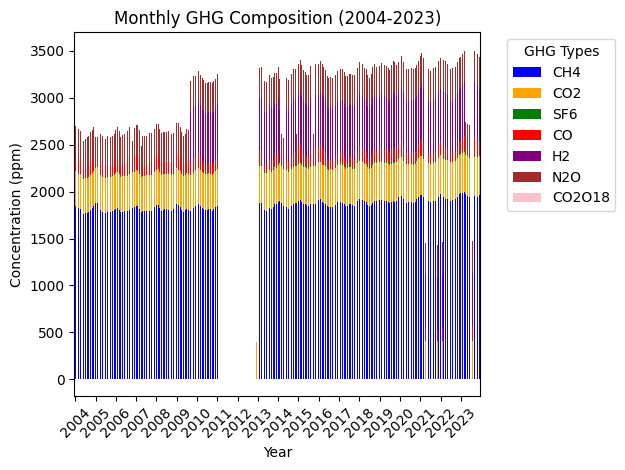

In [152]:
plt.figure(figsize=(16, 10))
monthly_data.plot(kind='bar', stacked=True, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'])

plt.title('Monthly GHG Composition (2004-2023)')
plt.xlabel('Year')
plt.ylabel('Concentration (ppm)')

plt.xticks(ticks=range(0, len(monthly_data), 12), labels=monthly_data.index.year[::12], rotation=45)

plt.legend(title='GHG Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# WHAT IF CO2 DECREASES EACH DAY?

the latest value from the data is 415.71


In [153]:
future_years = np.arange(2024, 2101)
future_months = np.arange(1, 13)

In [154]:
future_time_in_months = []
for year in future_years:
    for month in future_months:
        future_time_in_months.append(year + (month - 1) / 12)

future_time_in_months = np.array(future_time_in_months).reshape(-1, 1)

In [155]:
initial_co2_value = 415.71
decrease_rate = 0.005

In [156]:
future_co2_values = []
for i, time_point in enumerate(future_time_in_months):
    year = 2024 + (i // 12)
    future_co2_value = initial_co2_value * ((1 - decrease_rate) ** (year - 2024))
    future_co2_values.append(future_co2_value)

In [157]:
future_co2_values = np.array(future_co2_values).reshape(-1, 1)

correlation_matrix = {
    'SF6': 0.62,
    'CH4': 0.67,
    'CO': -0.10,
    'CO2C13': 0.00,
    'CO2O18': 0.10,
    'H2': 0.18,
    'N2O': 0.58
}

In [158]:
def adjust_values(base_value, correlation, future_co2_values, initial_co2_value):
    return base_value + correlation * (future_co2_values - initial_co2_value)

In [159]:
initial_values = {
    'SF6': 11.79,
    'CH4': 1966.52,
    'CO': 130.69,
    'CO2C13': -8.057,
    'CO2O18': 0.121,
    'H2': 571.01,
    'N2O': 338.41
}

In [160]:
future_values = {}
for gas, correlation in correlation_matrix.items():
    future_values[gas] = adjust_values(initial_values[gas], correlation, future_co2_values, initial_co2_value)

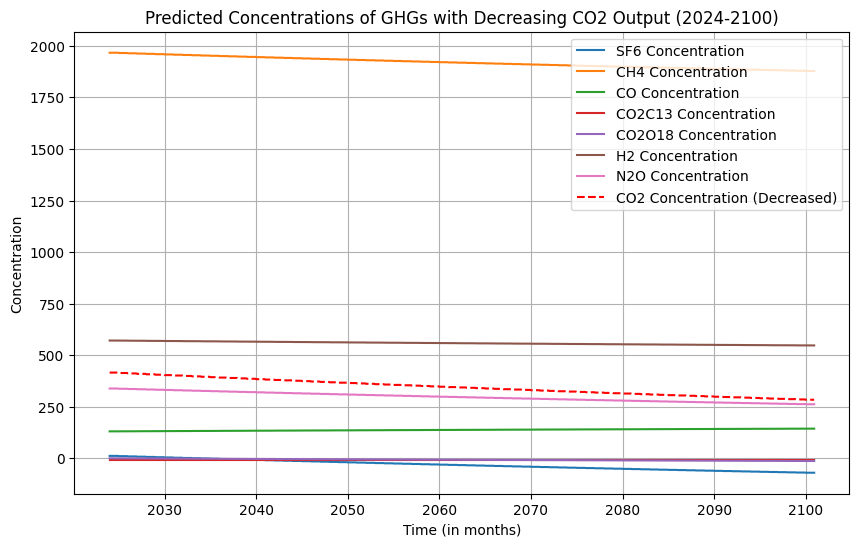

In [161]:
plt.figure(figsize=(10, 6))

for gas, values in future_values.items():
    plt.plot(future_time_in_months, values, label=f'{gas} Concentration')

plt.plot(future_time_in_months, future_co2_values, label='CO2 Concentration (Decreased)', linestyle='--', color='red')
plt.xlabel('Time (in months)')
plt.ylabel('Concentration')
plt.title('Predicted Concentrations of GHGs with Decreasing CO2 Output (2024-2100)')
plt.legend()
plt.grid(True)
plt.show()

CO2 Decrease and Other GHGs Decrease
The decline in several GHGs (SF6, CH4, CO, CO2O18, H2, N2O) along with CO2 can be attributed to a positive correlation between CO2 and these gases. The shared sources of emissions, such as fossil fuel combustion and agriculture, link the concentration trends of CO2 and other GHGs. This aligns with Giannelos et al. (2024), who emphasize the importance of building sectors and energy use in the emission of CO2 and associated pollutants, suggesting that reducing emissions in key sectors also affects other GHGs.

From a climate change stabilization perspective, Hoegh-Guldberg et al. (2019) highlight that CO2 and other GHGs are part of a broader interconnected system where reductions in CO2 can often drive simultaneous reductions in other GHGs due to overlapping anthropogenic sources. This reduction helps in stabilizing global warming by limiting radiative forcing from multiple GHGs, a key theme also covered in Ramaswamy et al. (1991).

CO2C13 Increase with CO2 Decrease
The observed increase in CO2C13 as CO2 decreases points to the negative correlation (-0.85) between overall CO2 and CO2C13. This may reflect shifts in the carbon cycle, particularly a transition away from fossil fuel-derived CO2 (which is depleted in carbon-13) toward natural processes that are relatively richer in this isotope.

The increase in CO2C13 is supported by Sherwood et al. (2020), who discuss the complex dynamics of carbon cycles and the role that natural processes, such as ocean-atmosphere interactions, play in regulating atmospheric carbon. This isotopic change signals a shift toward a greater relative influence of non-fossil-fuel sources of CO2, as natural processes contribute proportionally more CO2C13 compared to anthropogenic activities.

Implications
The co-benefits of CO2 reduction on other GHGs, particularly CH4 and N2O, suggest that cutting emissions can have broader positive effects on climate mitigation efforts. According to Lindsey & Dahlman (2020), reductions in multiple GHGs simultaneously would likely result in a slower rise in global temperatures and improved outcomes in global climate change stabilization efforts.

Furthermore, Rugenstein et al. (2019) emphasize that reducing CO2 emissions contributes to lowering equilibrium climate sensitivity, meaning the climate system’s long-term response to GHG reductions could be more substantial than previously anticipated. This underscores the importance of broad-based emission reduction strategies in stabilizing the climate.

In summary, the correlation between CO2 and other GHGs suggests that emission reduction strategies targeting CO2 can simultaneously reduce other harmful gases. However, shifts in isotopic signatures, such as the increase in CO2C13, signal changes in carbon cycle dynamics, particularly reduced fossil fuel emissions, contributing to a more balanced carbon budget. These insights align with the broader scientific understanding of the interconnectedness of GHGs and their role in climate change, as illustrated in various studies .

In [162]:
final_predicted_co2_value = future_co2_values[-1]  # Last value in the list

print(f"The final predicted CO2 concentration in 2100 is: {final_predicted_co2_value}")

The final predicted CO2 concentration in 2100 is: [284.01717827]


# WHAT IF CH4 DECREASES EACH DAY?

The latest value of CH4 is 1966.52

In [163]:
future_years = np.arange(2024, 2101)
future_months = np.arange(1, 13)

In [164]:
future_time_in_months = []
for year in future_years:
    for month in future_months:
        future_time_in_months.append(year + (month - 1) / 12)

future_time_in_months = np.array(future_time_in_months).reshape(-1, 1)

In [165]:
initial_ch4_value = 1966.52
decrease_rate = 0.015

In [166]:
future_ch4_values = []
for i, time_point in enumerate(future_time_in_months):
    year = 2024 + (i // 12)
    future_ch4_value = initial_ch4_value * ((1 - decrease_rate) ** (year - 2024))
    future_ch4_values.append(future_ch4_value)

In [167]:
future_ch4_values = np.array(future_ch4_values).reshape(-1, 1)

correlation_matrix = {
    'SF6': 0.80,
    'CO': -0.10,
    'CO2': 0.32,
    'CO2C13': -0.85,
    'CO2O18': 0.39,
    'H2': 0.78,
    'N2O': 0.84
}

In [168]:
def adjust_values(base_value, correlation, future_ch4_values, initial_ch4_value):
    return base_value + correlation * (future_ch4_values - initial_ch4_value)

In [169]:
initial_values = {
    'SF6': 11.79,
    'CH4': 1966.52,
    'CO': 130.69,
    'CO2': 415.71,
    'CO2C13': -8.057,
    'CO2O18': 0.121,
    'H2': 571.01,
    'N2O': 338.41
}

In [170]:
future_values = {}
for gas, correlation in correlation_matrix.items():
    future_values[gas] = adjust_values(initial_values[gas], correlation, future_ch4_values, initial_ch4_value)

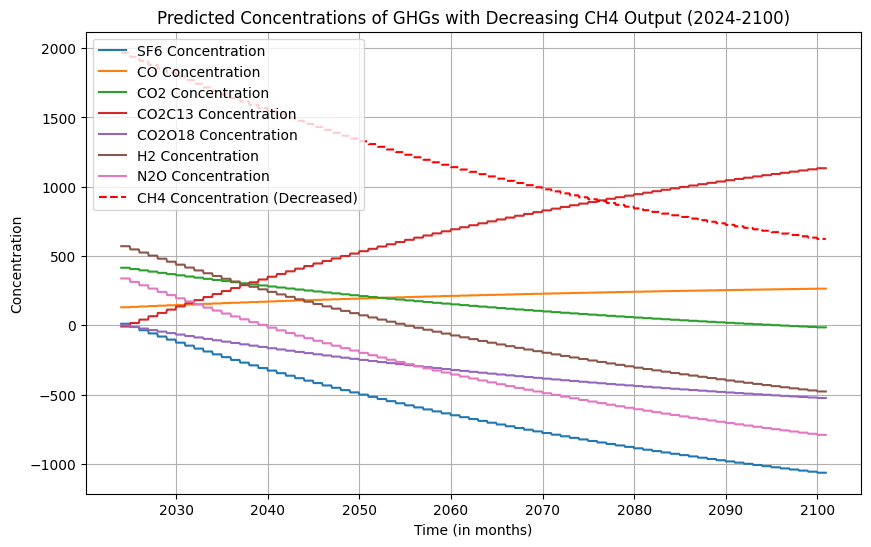

In [171]:
plt.figure(figsize=(10, 6))

for gas, values in future_values.items():
    plt.plot(future_time_in_months, values, label=f'{gas} Concentration')

plt.plot(future_time_in_months, future_ch4_values, label='CH4 Concentration (Decreased)', linestyle='--', color='red')
plt.xlabel('Time (in months)')
plt.ylabel('Concentration')
plt.title('Predicted Concentrations of GHGs with Decreasing CH4 Output (2024-2100)')
plt.legend()
plt.grid(True)
plt.show()

The decrease in methane (CH₄) emissions has a significant impact on other greenhouse gases (GHGs), which is supported by the positive correlations observed between CH₄ and gases like SF₆, CO, CO₂, CO₂O₁₈, H₂, and N₂O. This positive correlation suggests that reductions in methane could lead to reductions in these gases as well, a trend that can be attributed to common emission sources and atmospheric interactions.

Environmental Connections
Many greenhouse gases, including CH₄, CO₂, and N₂O, are released from overlapping sources—primarily human activities like fossil fuel combustion, agriculture, and waste management. Giannelos et al. (2024) emphasized the role of emission reduction efforts in sectors such as energy and industry, highlighting how machine learning models can predict and guide strategies to reduce CO₂ emissions in the building sector. As policies or practices reduce CO₂ and CH₄ emissions in these sectors, a decrease in related GHGs is often observed because their sources are intertwined.

Moreover, methane is a highly potent greenhouse gas, and its reduction could have significant indirect effects on other gases. As Hoegh-Guldberg et al. (2019) noted, the stabilization of global climate change hinges on coordinated reductions in all major GHGs. Since methane's atmospheric concentration often correlates with that of other pollutants, cutting methane emissions, as part of broader climate mitigation strategies, helps drive down concentrations of gases that share similar emission pathways.

Chemical Reactions
Another factor contributing to the reduction of multiple GHGs alongside methane is atmospheric chemistry. Methane plays a crucial role in atmospheric reactions, especially in the formation of tropospheric ozone and its interaction with hydroxyl radicals (OH). Methane reduction can alter these chemical reactions, affecting the lifecycles of other gases like CO and CO₂, further leading to their decline. Ramanswamy et al. (1991) emphasized the interconnected nature of radiative forcing from different GHGs, reinforcing the idea that changes in one major gas, like methane, can influence the concentrations of others through chemical interactions.

Impacts on CO₂C13
The behavior of CO₂C13 is notably different. Unlike the other gases, CO₂C13 shows no correlation with methane, indicating that its atmospheric concentration is governed by independent factors. CO₂C13 is an isotopic variant of carbon dioxide, and its concentration tends to be more influenced by processes such as carbon isotope fractionation. As noted by Lindsey and Dahlman (2020), isotopic changes in CO₂C13 may reflect shifts in carbon sources, such as reduced fossil fuel burning, which is rich in carbon-12 isotopes. When methane and fossil fuel CO₂ emissions decrease, the relative proportion of CO₂C13 may rise, signaling a shift in the carbon cycle toward more natural or biogenic processes that emit higher levels of carbon-13.

Broader Climate Mitigation Implications
Efforts to reduce methane could have substantial climate benefits beyond just lowering its direct greenhouse effect. As noted by Rugenstein et al. (2019), the reduction of multiple GHGs can contribute to a decrease in overall radiative forcing, helping to stabilize global temperatures. The reduction in methane and its associated GHGs supports global temperature control efforts, as outlined by Sherwood et al. (2020), where comprehensive reductions across different gases are necessary to limit temperature increases and meet climate goals.

In conclusion, the positive correlation between methane and other GHGs like SF₆, CO, CO₂, and N₂O suggests that cutting methane emissions can significantly reduce the overall greenhouse effect. Additionally, the unique behavior of CO₂C13 underlines the complexity of the carbon cycle and how reductions in fossil fuel emissions affect atmospheric carbon isotopes.

In [172]:
final_predicted_ch4_value = future_ch4_values[-1]  # Last value in the list

print(f"The final predicted CH4 concentration in 2100 is: {final_predicted_ch4_value}")

The final predicted CH4 concentration in 2100 is: [623.52214929]


Estimated Temperature using the predictive

In [173]:
def radiative_forcing(CO2, CH4, N2O):
    CO2_0 = 280
    CH4_0 = 1870
    N2O_0 = 270

    RF_CO2 = 5.35 * np.log(CO2 / CO2_0)
    RF_CH4 = 0.036 * (np.sqrt(CH4) - np.sqrt(CH4_0))
    RF_N2O = 0.12 * (np.sqrt(N2O) - np.sqrt(N2O_0))

    return RF_CO2 + RF_CH4 + RF_N2O

In [174]:
dtCH4 = pd.read_excel('CH4.xlsx')
dtCO2 = pd.read_excel('CO2.xlsx')
dtN2O = pd.read_excel('N2O.xlsx')

In [175]:
dtCH4['time_in_months'] = dtCH4['year'] + (dtCH4['month'] - 1) / 12
dtCH4['value'] = pd.to_numeric(dtCH4['value'], errors='coerce')
dtCH4 = dtCH4.dropna()

In [176]:
dtCO2['time_in_months'] = dtCO2['year'] + (dtCO2['month'] - 1) / 12
dtCO2['value'] = pd.to_numeric(dtCO2['value'], errors='coerce')
dtCO2 = dtCO2.dropna()

In [177]:
dtN2O['time_in_months'] = dtN2O['year'] + (dtN2O['month'] - 1) / 12
dtN2O['value'] = pd.to_numeric(dtN2O['value'], errors='coerce')
dtN2O = dtN2O.dropna()

In [178]:
modelCH4 = LinearRegression()
XCH4 = dtCH4[['time_in_months']]
yCH4 = dtCH4['value']
modelCH4.fit(XCH4, yCH4)

LinearRegression()

In [179]:
modelCO2 = LinearRegression()
XCO2 = dtCO2[['time_in_months']]
yCO2 = dtCO2['value']
modelCO2.fit(XCO2, yCO2)

LinearRegression()

In [180]:
modelN2O = LinearRegression()
XN2O = dtN2O[['time_in_months']]
yN2O = dtN2O['value']
modelN2O.fit(XN2O, yN2O)

LinearRegression()

In [181]:
future_years = np.arange(2024, 2101)
future_months = np.arange(1, 13)
future_time_in_months = [year + (month - 1) / 12 for year in future_years for month in future_months]

future_time_in_months = np.array(future_time_in_months).reshape(-1, 1)
predicted_CH4 = modelCH4.predict(future_time_in_months)
predicted_CO2 = modelCO2.predict(future_time_in_months)
predicted_N2O = modelN2O.predict(future_time_in_months)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [182]:
total_rf = radiative_forcing(predicted_CO2, predicted_CH4, predicted_N2O)

In [183]:
climate_sensitivity = 0.8
temperature_change = climate_sensitivity * total_rf

future_years_months = [2024 + (i / 12) for i in range(len(future_time_in_months))]

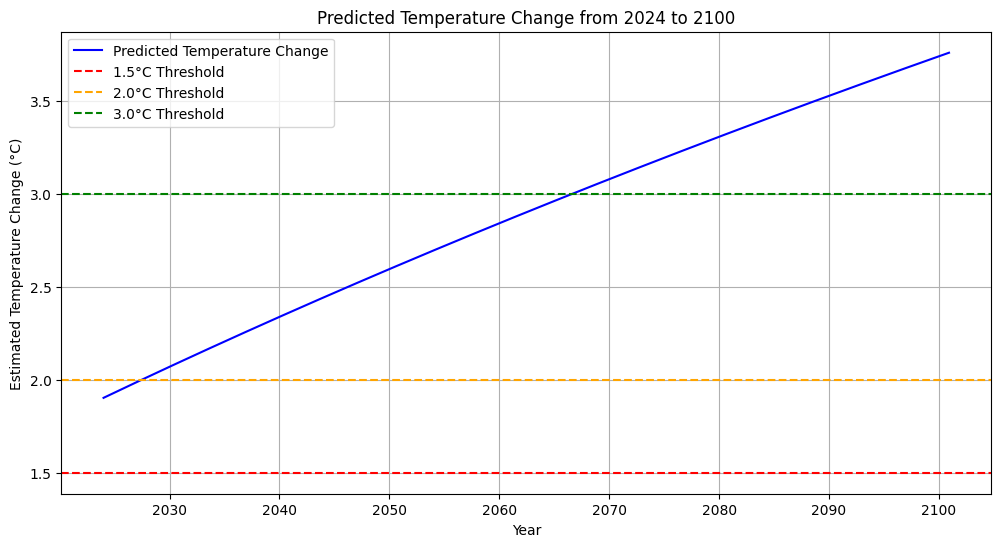

The estimated temperature change by the end of 2100 is: 3.76°C


In [184]:
plt.figure(figsize=(12, 6))
plt.plot(future_years_months, temperature_change, color='blue', label='Predicted Temperature Change')
plt.axhline(y=1.5, color='red', linestyle='--', label='1.5°C Threshold')
plt.axhline(y=2.0, color='orange', linestyle='--', label='2.0°C Threshold')
plt.axhline(y=3.0, color='green', linestyle='--', label='3.0°C Threshold')
plt.xlabel('Year')
plt.ylabel('Estimated Temperature Change (°C)')
plt.title('Predicted Temperature Change from 2024 to 2100')
plt.legend()
plt.grid(True)
plt.show()

last_temperature_change = temperature_change[-1]
last_year = future_years_months[-1]

print(f"The estimated temperature change by the end of {int(last_year)} is: {last_temperature_change:.2f}°C")

Estimated Temperature with CO2 decrease

In [185]:
future_years = np.arange(2024, 2101)
future_months = np.arange(1, 13)
future_time_in_months = [year + (month - 1) / 12 for year in future_years for month in future_months]

future_time_in_months = np.array(future_time_in_months).reshape(-1, 1)
predicted_CH4 = modelCH4.predict(future_time_in_months)
predicted_CO2 = modelCO2.predict(future_time_in_months)
predicted_N2O = modelN2O.predict(future_time_in_months)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [186]:
years = np.arange(2024, 2101)
for i, year in enumerate(years):
    reduction_factor = 0.995 ** (year - 2024)
    predicted_CO2[i * 12:(i + 1) * 12] *= reduction_factor

In [187]:
total_rf = radiative_forcing(predicted_CO2, predicted_CH4, predicted_N2O)

In [188]:
climate_sensitivity = 0.8
temperature_change = climate_sensitivity * total_rf

future_years_months = [2024 + (i / 12) for i in range(len(future_time_in_months))]

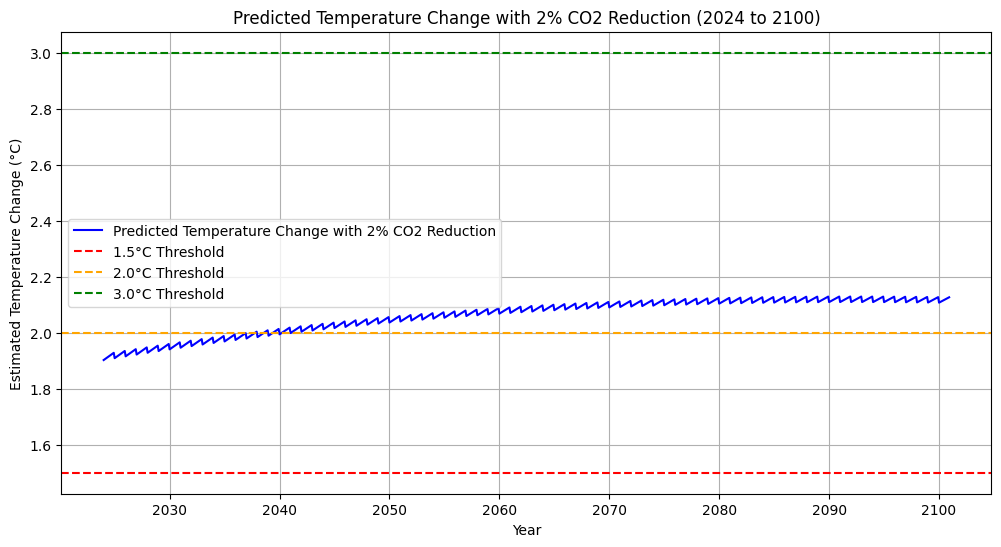

The estimated temperature change by the end of 2100 is: 2.13°C


In [189]:
plt.figure(figsize=(12, 6))
plt.plot(future_years_months, temperature_change, color='blue', label='Predicted Temperature Change with 2% CO2 Reduction')
plt.axhline(y=1.5, color='red', linestyle='--', label='1.5°C Threshold')
plt.axhline(y=2.0, color='orange', linestyle='--', label='2.0°C Threshold')
plt.axhline(y=3.0, color='green', linestyle='--', label='3.0°C Threshold')
plt.xlabel('Year')
plt.ylabel('Estimated Temperature Change (°C)')
plt.title('Predicted Temperature Change with 2% CO2 Reduction (2024 to 2100)')
plt.legend()
plt.grid(True)
plt.show()

last_temperature_change = temperature_change[-1]
last_year = future_years_months[-1]

print(f"The estimated temperature change by the end of {int(last_year)} is: {last_temperature_change:.2f}°C")

CH4 Decrease

In [190]:
future_years = np.arange(2024, 2101)
future_months = np.arange(1, 13)
future_time_in_months = [year + (month - 1) / 12 for year in future_years for month in future_months]

future_time_in_months = np.array(future_time_in_months).reshape(-1, 1)
predicted_CH4 = modelCH4.predict(future_time_in_months)
predicted_CO2 = modelCO2.predict(future_time_in_months)
predicted_N2O = modelN2O.predict(future_time_in_months)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [191]:
years = np.arange(2024, 2101)
for i, year in enumerate(years):
    reduction_factor = 0.985 ** (year - 2024)
    predicted_CH4[i * 12:(i + 1) * 12] *= reduction_factor

In [192]:
total_rf = radiative_forcing(predicted_CO2, predicted_CH4, predicted_N2O)

In [193]:
climate_sensitivity = 0.8
temperature_change = climate_sensitivity * total_rf

future_years_months = [2024 + (i / 12) for i in range(len(future_time_in_months))]

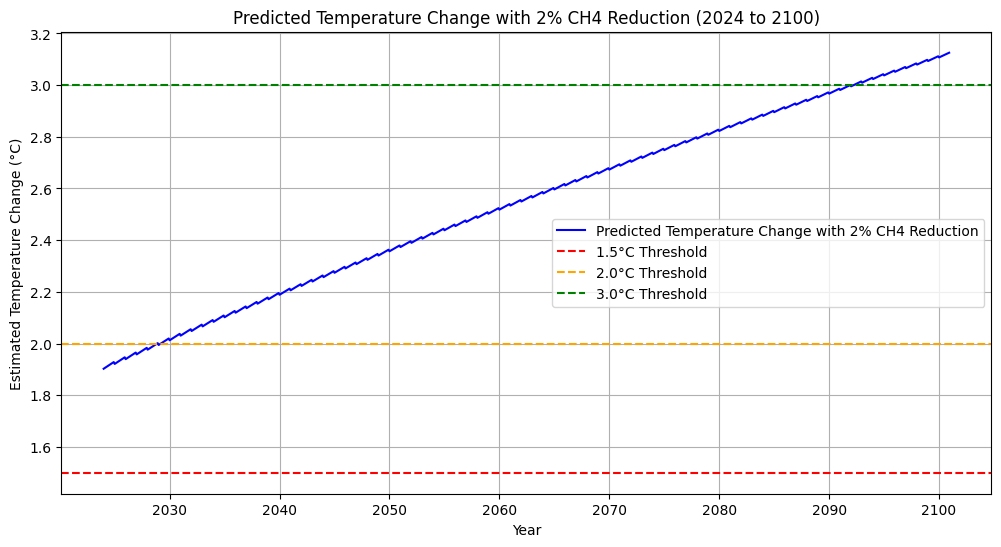

The estimated temperature change by the end of 2100 is: 3.13°C


In [194]:
plt.figure(figsize=(12, 6))
plt.plot(future_years_months, temperature_change, color='blue', label='Predicted Temperature Change with 2% CH4 Reduction')
plt.axhline(y=1.5, color='red', linestyle='--', label='1.5°C Threshold')
plt.axhline(y=2.0, color='orange', linestyle='--', label='2.0°C Threshold')
plt.axhline(y=3.0, color='green', linestyle='--', label='3.0°C Threshold')
plt.xlabel('Year')
plt.ylabel('Estimated Temperature Change (°C)')
plt.title('Predicted Temperature Change with 2% CH4 Reduction (2024 to 2100)')
plt.legend()
plt.grid(True)
plt.show()

last_temperature_change = temperature_change[-1]
last_year = future_years_months[-1]

print(f"The estimated temperature change by the end of {int(last_year)} is: {last_temperature_change:.2f}°C")

Both GHG decrease

In [195]:
future_years = np.arange(2024, 2101)
future_months = np.arange(1, 13)
future_time_in_months = [year + (month - 1) / 12 for year in future_years for month in future_months]

future_time_in_months = np.array(future_time_in_months).reshape(-1, 1)
predicted_CH4 = modelCH4.predict(future_time_in_months)
predicted_CO2 = modelCO2.predict(future_time_in_months)
predicted_N2O = modelN2O.predict(future_time_in_months)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [196]:
years = np.arange(2024, 2101)
for i, year in enumerate(years):
    reduction_factorCH4 = 0.985 ** (year - 2024)
    reduction_factorCO2 = 0.995 ** (year - 2024)
    predicted_CH4[i * 12:(i + 1) * 12] *= reduction_factorCH4
    predicted_CO2[i * 12:(i + 1) * 12] *= reduction_factorCO2

In [197]:
total_rf = radiative_forcing(predicted_CO2, predicted_CH4, predicted_N2O)

In [198]:
climate_sensitivity = 0.8
temperature_change = climate_sensitivity * total_rf

future_years_months = [2024 + (i / 12) for i in range(len(future_time_in_months))]

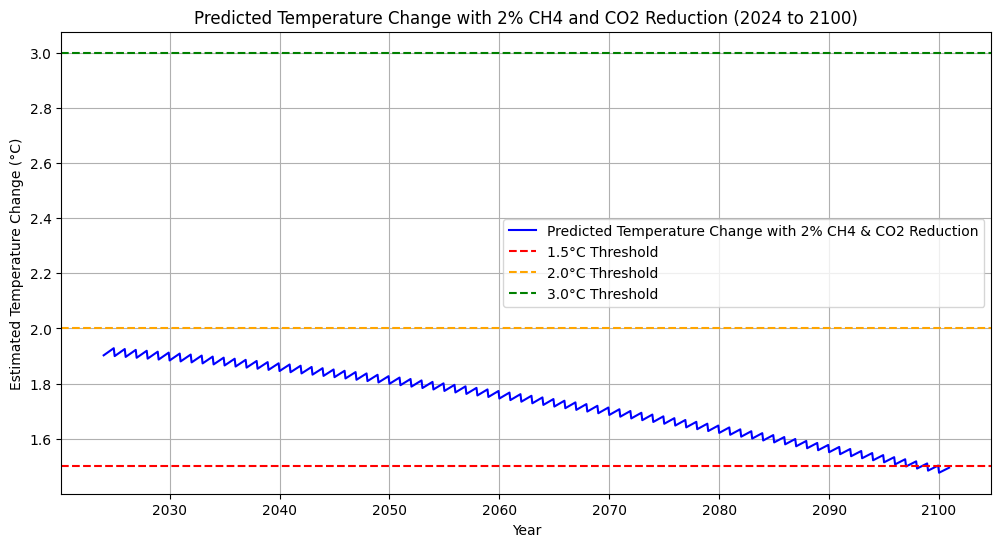

The estimated temperature change by the end of 2100 is: 1.49°C


In [199]:
plt.figure(figsize=(12, 6))
plt.plot(future_years_months, temperature_change, color='blue', label='Predicted Temperature Change with 2% CH4 & CO2 Reduction')
plt.axhline(y=1.5, color='red', linestyle='--', label='1.5°C Threshold')
plt.axhline(y=2.0, color='orange', linestyle='--', label='2.0°C Threshold')
plt.axhline(y=3.0, color='green', linestyle='--', label='3.0°C Threshold')
plt.xlabel('Year')
plt.ylabel('Estimated Temperature Change (°C)')
plt.title('Predicted Temperature Change with 2% CH4 and CO2 Reduction (2024 to 2100)')
plt.legend()
plt.grid(True)
plt.show()

last_temperature_change = temperature_change[-1]
last_year = future_years_months[-1]

print(f"The estimated temperature change by the end of {int(last_year)} is: {last_temperature_change:.2f}°C")

CO2 Reduction has a significant impact on limiting temperature rise, as CO2 is one of the most long-lived and abundant greenhouse gases in the atmosphere.

CH4 Reduction also plays a crucial role in reducing warming, but methane (CH4) is more potent than CO2 over shorter timescales. However, its atmospheric concentration is lower, so the impact of reducing methane alone is slightly less than reducing CO2.

Combined Reduction of CO2 and CH4 is essential to meet the 1.5°C target. The synergy between reducing both gases demonstrates the importance of multi-gas mitigation strategies in climate action.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


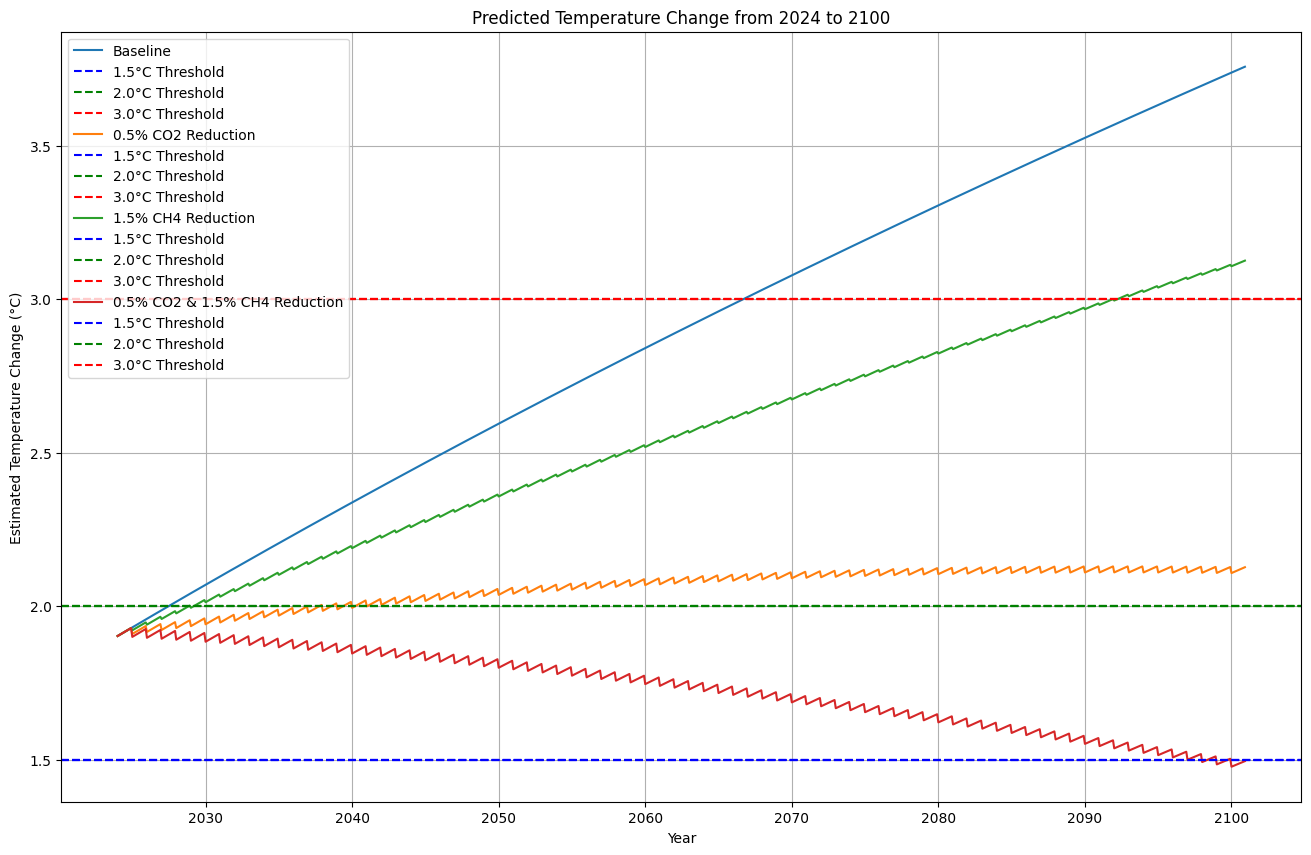

The estimated temperature change by 2100 for Baseline is: 3.76°C
The estimated temperature change by 2100 for 0.5% CO2 Reduction is: 2.13°C
The estimated temperature change by 2100 for 1.5% CH4 Reduction is: 3.13°C
The estimated temperature change by 2100 for Both CO2 & CH4 Reduction is: 1.49°C


In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Function for calculating radiative forcing
def radiative_forcing(CO2, CH4, N2O):
    CO2_0 = 280
    CH4_0 = 1870
    N2O_0 = 270

    RF_CO2 = 5.35 * np.log(CO2 / CO2_0)
    RF_CH4 = 0.036 * (np.sqrt(CH4) - np.sqrt(CH4_0))
    RF_N2O = 0.12 * (np.sqrt(N2O) - np.sqrt(N2O_0))

    return RF_CO2 + RF_CH4 + RF_N2O

# Load data and prepare time series
dtCH4 = pd.read_excel('CH4.xlsx')
dtCO2 = pd.read_excel('CO2.xlsx')
dtN2O = pd.read_excel('N2O.xlsx')

for dt in [dtCH4, dtCO2, dtN2O]:
    dt['time_in_months'] = dt['year'] + (dt['month'] - 1) / 12
    dt['value'] = pd.to_numeric(dt['value'], errors='coerce')
    dt.dropna(inplace=True)

# Fit linear models for each GHG
models = {}
for gas, dt in zip(['CH4', 'CO2', 'N2O'], [dtCH4, dtCO2, dtN2O]):
    model = LinearRegression()
    model.fit(dt[['time_in_months']], dt['value'])
    models[gas] = model

# Define future time period and predict GHG levels
future_years = np.arange(2024, 2101)
future_months = np.arange(1, 13)
future_time_in_months = np.array([year + (month - 1) / 12 for year in future_years for month in future_months]).reshape(-1, 1)

predicted_CH4 = models['CH4'].predict(future_time_in_months)
predicted_CO2 = models['CO2'].predict(future_time_in_months)
predicted_N2O = models['N2O'].predict(future_time_in_months)

# Function to plot temperature changes
plt.figure(figsize=(16, 10))
def plot_temperature_change(temperature_change, label):
    future_years_months = [2024 + (i / 12) for i in range(len(future_time_in_months))]
    plt.plot(future_years_months, temperature_change, label=label)
    plt.axhline(y=1.5, color='blue', linestyle='--', label='1.5°C Threshold')
    plt.axhline(y=2.0, color='green', linestyle='--', label='2.0°C Threshold')
    plt.axhline(y=3.0, color='red', linestyle='--', label='3.0°C Threshold')
    plt.xlabel('Year')
    plt.ylabel('Estimated Temperature Change (°C)')
    plt.title('Predicted Temperature Change from 2024 to 2100')
    plt.legend()
    plt.grid(True)

# Scenario 1: Baseline (No Reduction)
total_rf = radiative_forcing(predicted_CO2, predicted_CH4, predicted_N2O)
climate_sensitivity = 0.8
temperature_change_baseline = climate_sensitivity * total_rf
plot_temperature_change(temperature_change_baseline, label="Baseline")

# Scenario 2: CO2 Reduction by 0.5% per year
predicted_CO2_reduced = predicted_CO2.copy()
for i, year in enumerate(future_years):
    reduction_factor = 0.995 ** (year - 2024)
    predicted_CO2_reduced[i * 12:(i + 1) * 12] *= reduction_factor
total_rf_CO2 = radiative_forcing(predicted_CO2_reduced, predicted_CH4, predicted_N2O)
temperature_change_CO2 = climate_sensitivity * total_rf_CO2
plot_temperature_change(temperature_change_CO2, label="0.5% CO2 Reduction")

# Scenario 3: CH4 Reduction by 1.5% per year
predicted_CH4_reduced = predicted_CH4.copy()
for i, year in enumerate(future_years):
    reduction_factor = 0.985 ** (year - 2024)
    predicted_CH4_reduced[i * 12:(i + 1) * 12] *= reduction_factor
total_rf_CH4 = radiative_forcing(predicted_CO2, predicted_CH4_reduced, predicted_N2O)
temperature_change_CH4 = climate_sensitivity * total_rf_CH4
plot_temperature_change(temperature_change_CH4, label="1.5% CH4 Reduction")

# Scenario 4: Both CO2 and CH4 Reduction
predicted_CO2_both = predicted_CO2.copy()
predicted_CH4_both = predicted_CH4.copy()
for i, year in enumerate(future_years):
    reduction_factor_CO2 = 0.995 ** (year - 2024)
    reduction_factor_CH4 = 0.985 ** (year - 2024)
    predicted_CO2_both[i * 12:(i + 1) * 12] *= reduction_factor_CO2
    predicted_CH4_both[i * 12:(i + 1) * 12] *= reduction_factor_CH4
total_rf_both = radiative_forcing(predicted_CO2_both, predicted_CH4_both, predicted_N2O)
temperature_change_both = climate_sensitivity * total_rf_both
plot_temperature_change(temperature_change_both, label="0.5% CO2 & 1.5% CH4 Reduction")

plt.show()

# Print final temperature changes for each scenario
for name, temp_change in zip(
        ["Baseline", "0.5% CO2 Reduction", "1.5% CH4 Reduction", "Both CO2 & CH4 Reduction"],
        [temperature_change_baseline, temperature_change_CO2, temperature_change_CH4, temperature_change_both]):
    print(f"The estimated temperature change by 2100 for {name} is: {temp_change[-1]:.2f}°C")


# Reference

Giannelos, S., Bellizio, F., Strbac, G., & Zhang, T. (2024). Machine learning approaches for predictions of CO2 emissions in the building sector. Electric Power Systems Research, 235, 110735. https://doi.org/10.1016/j.epsr.2024.110735

Hoegh-Guldberg, O., Jacob, D., Taylor, M., Bolaños, T. G., Bindi, M., Brown, S., Camilloni, I. A., Diedhiou, A., Djalante, R., Ebi, K., Engelbrecht, F., Guiot, J., Hijioka, Y., Mehrotra, S., Hope, C. W., Payne, A. J., Pörtner, H., Seneviratne, S. I., Thomas, A., . . . Zhou, G. (2019). The human imperative of stabilizing global climate change at 1.5°C. Science, 365(6459). https://doi.org/10.1126/science.aaw6974

Lindsey, R., & Dahlman, L. (2020). Climate change: Global temperature. Climate. gov, 16.

Poortinga, W., Whitmarsh, L., Steg, L., Böhm, G., & Fisher, S. (2019). Climate change perceptions and their individual-level determinants: A cross-European analysis. Global Environmental Change, 55, 25–35. https://doi.org/10.1016/j.gloenvcha.2019.01.007

Ramanswamy, V., Shine, K., Leovy, C., Wang, W., Rodhe, H., Wuebbles, D. J., Ding, M., Lelieveld, J., Edmonds, J. A., & Mccormick, M. P. (1991). Radiative forcing of climate. Climate Change: The IPCC Scientific Assessment, 41–68. https://ntrs.nasa.gov/api/citations/19930001906/downloads/19930001906.pdf

Rugenstein, M., Bloch‐Johnson, J., Gregory, J., Andrews, T., Mauritsen, T., Li, C., Frölicher, T. L., Paynter, D., Danabasoglu, G., Yang, S., Dufresne, J., Cao, L., Schmidt, G. A., Abe‐Ouchi, A., Geoffroy, O., & Knutti, R. (2019). Equilibrium climate sensitivity estimated by equilibrating climate models. Geophysical Research Letters, 47(4). https://doi.org/10.1029/2019gl083898

Sherwood, S. C., Webb, M. J., Annan, J. D., Armour, K. C., Forster, P. M., Hargreaves, J. C., Hegerl, G., Klein, S. A., Marvel, K. D., Rohling, E. J., Watanabe, M., Andrews, T., Braconnot, P., Bretherton, C. S., Foster, G. L., Hausfather, Z., Von Der Heydt, A. S., Knutti, R., Mauritsen, T., . . . Zelinka, M. D. (2020). An assessment of Earth’s climate sensitivity using multiple lines of evidence. Reviews of Geophysics, 58(4). https://doi.org/10.1029/2019rg000678



Dataset:

https://gml.noaa.gov/aftp/data/trace_gases/ch4/flask/surface/

https://gml.noaa.gov/aftp/data/trace_gases/co/flask/surface/

https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/

https://gml.noaa.gov/aftp/data/trace_gases/h2/flask/surface/

https://gml.noaa.gov/aftp/data/trace_gases/n2o/flask/surface/

https://gml.noaa.gov/aftp/data/trace_gases/sf6/flask/surface/

https://gml.noaa.gov/aftp/data/trace_gases/co2c13/flask/surface/

https://gml.noaa.gov/aftp/data/trace_gases/co2o18/flask/surface/


